# **Asignatura**: Aprendizaje Automático

**Práctica 1**: Aprendizaje supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 28 de Marzo de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>María Cribillés Pérez</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Problema de clasificación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de clasificación, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar sistemas olfativos de Inteligencia Artificial mediante **narices electrónicas (*e-Nose*)**, capaces de determinar la calidad de una muestra de carne en base a los gases emitidos por la misma. El conjunto de datos se obteniene a partir de la investigación realizada en el siguiente artículo:

- Feyzioglu, A.; Taspinar, Y.S. Beef Quality Classification with Reduced E-Nose Data Features According to Beef Cut Types. Sensors 2023, 23, 2222 (URL: <a href="https://www.mdpi.com/1424-8220/23/4/2222">https://www.mdpi.com/1424-8220/23/4/2222</a>)



## Contexto y motivación del problema

Los controles de calidad alimentarios son un conjunto de procedimientos y normativas que se implementan para asegurar que los alimentos sean seguros, saludables y cumplan con los estándares establecidos. Esto incluye la supervisión de la producción, el procesamiento, el almacenamiento y la distribución de los alimentos.

Los controles de calidad pueden abarcar desde la inspección de las materias primas hasta la evaluación del producto final, asegurando que no haya contaminantes y que se mantengan las propiedades nutricionales. Normalmente, el proceso de control de calidad conlleva la toma de muestras de alimentos, su transporte a un laboratorio, la realización de diferentes análisis químicos sobre el alimento y la generación de informes positivos o negativos.

Como alternativa a este proceso, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **sistemas olfativos electrónicos (*e-Noses*)** sensibles a los gases que pueden generar diferentes alimentos frescos o en descomposición. En particular, **nos crentraremos en la clasificación de la calidad de cortes de carne** haciendo uso de diferentes gases generados durante el proceso de descomposición de la misma.

Una **e-Nose** (*nariz electrónica*) es un dispositivo diseñado para detectar y analizar olores de manera similar a como lo hace el sentido del olfato en los seres humanos. Utilizan sensores químicos que pueden identificar diferentes compuestos volátiles en el aire (gases).

Estos dispositivos son muy útiles en diversas aplicaciones, como en la industria alimentaria para controlar la calidad de los productos, en la detección de contaminantes en el medio ambiente, o incluso en la medicina para identificar enfermedades a través del análisis de olores específicos.

La tecnología detrás de las narices electrónicas puede variar. En general, combinan sensores, algoritmos de procesamiento de datos y aprendizaje automático para interpretar los olores y proporcionar información útil.

<center>
<img src="https://cdn.open-pr.com/V/5/V505414311_g.jpg" />
</center>

## El conjunto de datos

El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS">https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XNFVTS</a>.


Se trata de un conjunto de datos que contiene 12 tipos de cortes de carne diferentes (redondo, solomillo superior, filete de lomo, carne de aleta, lomo corto, falda, terrón, carne de falta, interior/exterior, costillas, espinilla y grasa). Los cortes fueron monitorizados durante 37h hasta su deterioro utilizando 11 tipos de sensores de gas distintos. En cada medición, se asignó una categoría del estado de la carne con 4 etiquetas indicando la calidad "excelente", "buena", "aceptable" y "estropeada".


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de clasificar el estado de una muestra de carne, independientemente de su tipo de corte, partiendo de los datos proporcionados por cada uno de los sensores. El modelo de decisión para determinar el estado de la carne a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar ha sido preprocesado y extraído a partir de los datos originales, y tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de medición de cada tipo de sensor de gas (en total 11 tipos distintos).
- **Datos de salida (Y)**: Clasificación del tipo de carne.


El conjunto de datos a usar en la práctica se encuentra accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [175]:
#Incluimos las importaciones de librerías necesarias:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold

#modelos del segundo ejercicio
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [176]:
#Dataset disponible:
path_to_data_classification= 'https://www.dropbox.com/scl/fi/3zmizfgjfz5xbbr7xcn2x/MeatClassification.csv?rlkey=81gz5xipne04whrniwqc40r21&st=7o73a6qs&dl=1'

#Leemos el archivo csv donde está el dataset
data= pd.read_csv(path_to_data_classification)

#Enseñamos el principio del dataset (las 5 primeras filas)
data.head(5)

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9,Cut,Label
0,16.28,8.01,11.67,13.49,7.09,18.20,7.68,10.39,14.63,34.71,10.53,Striploin,Excellent
1,11.89,8.01,18.43,12.59,7.09,15.08,4.84,19.02,15.35,41.58,11.21,Shin,Spoiled
2,12.87,6.77,22.40,12.05,6.86,16.04,4.60,20.33,18.25,34.51,11.30,Inside-Outside,Spoiled
3,9.78,4.41,12.88,11.35,7.11,13.14,4.76,14.63,19.61,25.20,14.23,Brisket,Acceptable
4,16.42,10.14,13.30,18.36,8.92,27.75,7.62,12.06,16.72,44.07,14.70,Fat,Excellent


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un $ensemble$.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar).
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.

## Análisis descriptivo y exploratorio de los datos


**Aclaración**: voy a seguir la estructura del Notebook para las explicaciones sobre todo, pero no para la totalidad del código ya que no creo conveniente el orden de implementación. Por ejemplo, creo que es una buena técnica hacer la partición antes de hacer el preprocesamiento (por ejemplo la normalización) y el análisis exploratorio de los datos. Sin embargo, para el análisis exploratorio de los datos puede ser un poco lioso si hacemos la partición en k-fold ya que tendríamos cada vez un train y así podríamos sacar e interpretar gráficas representativas de todo el conjunto en lugar de una serie de gráficas para cada fold.

Empezamos viendo las características que tenemos a disposición.

In [177]:
#Columnas del dataset
data.columns

Index(['MQ135', 'MQ136', 'MQ137', 'MQ138', 'MQ2', 'MQ3', 'MQ4', 'MQ5', 'MQ6',
       'MQ8', 'MQ9', 'Cut', 'Label'],
      dtype='object')

Vemos que tenemos en total 13 columnas, donde 11 son tipos de sensores de gas, el tipo de corte de la carne y la propia etiqueta. Vamos a ver el tipo de cada columna:

In [178]:
#Funcion que nos da información sobre el dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MQ135   2400 non-null   float64
 1   MQ136   2400 non-null   float64
 2   MQ137   2400 non-null   float64
 3   MQ138   2400 non-null   float64
 4   MQ2     2400 non-null   float64
 5   MQ3     2400 non-null   float64
 6   MQ4     2400 non-null   float64
 7   MQ5     2400 non-null   float64
 8   MQ6     2400 non-null   float64
 9   MQ8     2400 non-null   float64
 10  MQ9     2400 non-null   float64
 11  Cut     2400 non-null   object 
 12  Label   2400 non-null   object 
dtypes: float64(11), object(2)
memory usage: 243.9+ KB


Podemos observar que los 11 sensores de gas son de tipo float 64, lo cual concuerda con los datos vistos anteriormente ya que eran números decimales.

En cuanto al corte y a la etiqueta, son de tipo object, es decir, categóricas. Por tanto, en el dataset tenemos datos tanto númericos como categóricos.

Además, también podemos observar que tenemos 2400 filas, es decir, 2400 entradas. Todas las variables tienen ese número de datos, por lo que nos está informando que no hay datos faltantes.

Como todos los sensores son datos numéricos, vamos a generar estadísticas descriptivas para ver un poco por encima como se distribuyen estos datos:

In [179]:
#Estadísticas descriptivas
#funcion describe() de pandas que nos describe numericamente los datos del dataframe
data.describe()

,MQ135,MQ136,MQ137,MQ138,MQ2,MQ3,MQ4,MQ5,MQ6,MQ8,MQ9
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,12.867592,8.653604,16.154671,12.335779,6.928496,14.679063,6.528142,15.001271,16.379921,35.730154,12.122863
std,2.828903,6.989394,5.454674,2.669185,1.560192,3.434043,3.498708,5.015889,6.164918,6.735156,2.168585
min,8.030000,2.780000,3.160000,7.700000,3.870000,7.880000,2.230000,5.600000,2.910000,15.990000,8.230000
25%,10.570000,5.250000,13.040000,10.310000,5.720000,12.680000,4.660000,11.460000,15.202500,31.570000,10.410000
50%,12.920000,6.800000,17.000000,12.050000,6.750000,14.470000,5.410000,14.390000,16.340000,36.780000,11.800000
75%,14.400000,8.070000,19.930000,13.820000,7.490000,15.987500,7.530000,17.820000,18.170000,41.320000,13.610000
max,20.510000,39.030000,28.670000,19.910000,12.640000,29.670000,24.250000,32.610000,41.050000,49.170000,18.170000


Volvemos a verificar que estas variables no tienen datos faltantes por la fila de "count". Obtenemos información acerca de la media, la desviación típica, el mínimo y máximo que toman y los percentiles 25, 50 y 75.
Destaca la columna MQ8 por tener un valor bastante más alto en general a las otras columnas. En contraposición, MQ2 y MQ4 parecen ser la más bajas de todas.
En cuanto a la desviación típica, la cual mide la dispersión alrededor de la media, el sensor MQ136 es el más alto, por lo que podría indicar que es muy sensible a cambios en las condiciones de la carne. Podríamos llegar a pensar que va a ser importante y discriminante para nuestro problema. Por otro lado, los sensores MQ2 y MQ9 tienen una baja variabilidad, por lo que podríamos pensar que sus medidas son más estables y no van a ser tan diferenciales a la hora de predecir.

Completamos este análisis más matemático de los sensores viendo la distribución de los valores de cada sensor con histogramas.



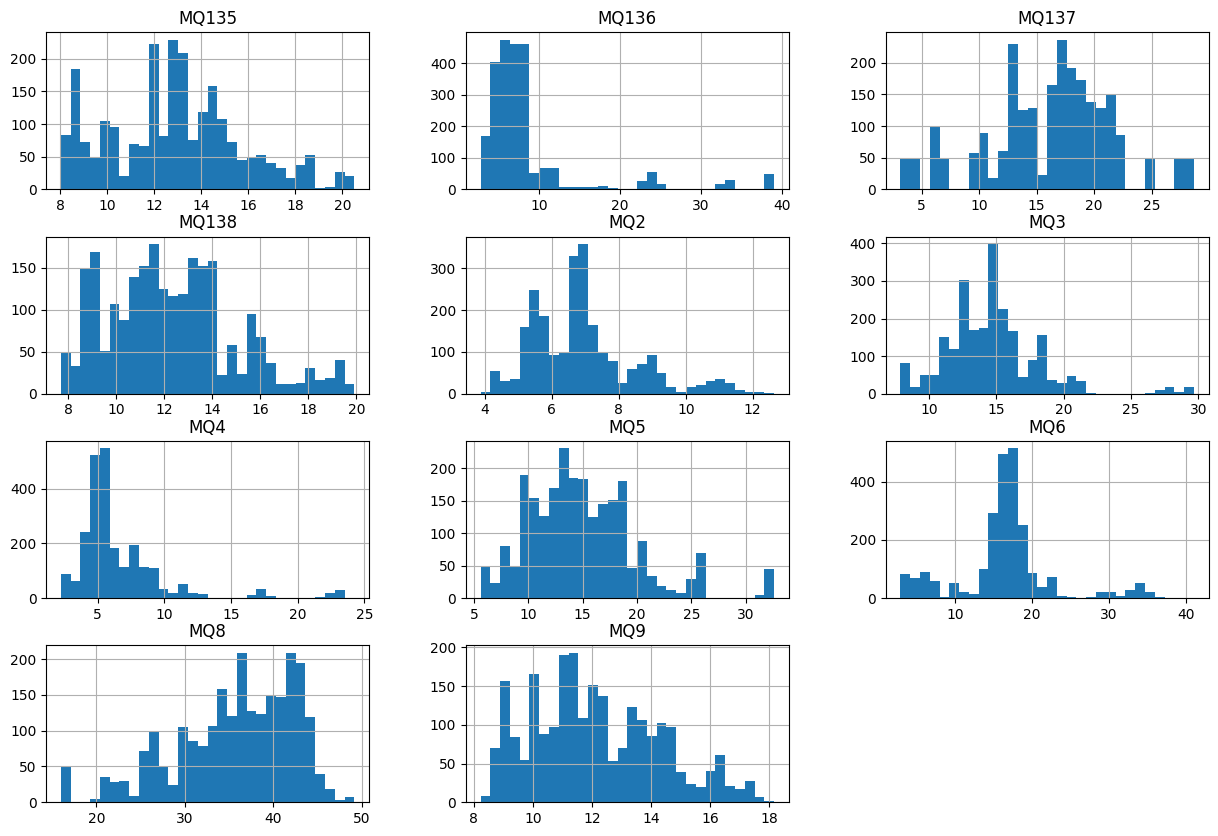

In [180]:
#Creamos un histograma
#hist(): funcion para calcular y dibujar un histograma de las variables numéricas
# agrupa los datos en x y contar el número de valores en cada agrupación, luego dibuja la distribución ya sea como un BarContainer o un Polígono.
#argumentos:
#bins=30: divide el rango de datos en 30 intervalos para el histograma.
#figsize=(15, 10): establece el tamaño de la figura a 15 pulgadas de ancho y 10 de alto.
data.hist(bins=30, figsize=(15, 10))

#plt.show(): funcion que muestra el histograma generado anteriormente
#sin argumentos
plt.show()

Antes de continuar, vamos a quitar del dataset la columna a predecir, la vamos a separar. Por tanto, vamos a separar las características (X) de la variable objetivo (Y).

Además, como queremos que la predicción sea independiente al corte, la eliminamos también. Es decir, no queremos aprender que corte tiene la carne ni depende de cual sea para clasificar la variable objetivo.

In [181]:
#Separamos características (X) de la variable a predecir (Y)
#drop(): funcion que crea un DataFrame X eliminando las columnas 'Label' y 'Cut' del dataset original. Es decir, elimina las columnas que se le pasen como parámetro
#data(): función que crea una serie Y con solo la columna 'Label' . Así separamos los datos de la variable objetivo
X = data.drop(columns=['Label', 'Cut'])  #Ademas, eliminamos 'Label' y Cut ya que queremos que sea independiente de la variable objetivo
Y = data['Label']

Vamos a ver un poco las variables categóricas: label. Esto es un poco peligroso ya que es la variable objetivo. Como he dicho anteriormente, si quisiesemos hacer un análisis perfecto, esto deberíamos hacer la partición antes y después mirar exclusivamente solo el train, nunca el test.

No vemos Cut porque no nos interesa y de hecho la hemos eliminado para obviarla.

In [182]:
#Frecuencia de cada clase en la variable objetivo
#value_counts(): función que cuenta la cantidad de ocurrencias de cada valor único en la columna objetivo
cuenta = data['Label'].value_counts()
print("Número de cada clase en la variable objetivo:")
print(cuenta)

Número de cada clase en la variable objetivo:
Label
Excellent     600
Spoiled       600
Acceptable    600
Good          600
Name: count, dtype: int64


Vemos como estamos ante una clasificación multiclase ya que tenemos que predecir la calidad de la carne entre 4 niveles: excelente, buena, aceptable y estropeada.

Vemos como está igualado todo, por lo que no tendríamos que tener problema de desbalanceo.

## Preprocesado de datos
Vamos a preparar un poco los datos antes de entrenar ya que suele ser mejor tener buenos datos para que den buenos resultados. Aun así, nos daremos cuenta que hace falta poco preprocesado ya que los datos están bastante filtrados y dan buenos resultados de por sí. Vamos a plantear los siguientes apartados:

*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos




### Selección, extracción de características y reducción de dimensionalidad

Para ver si existe correlación entre los sensores (las variables numéricas), vamos a estudiar la matriz de correlación. Con esta matriz solo podemos ver las correlacion lineales y detectar multicolinealidad:

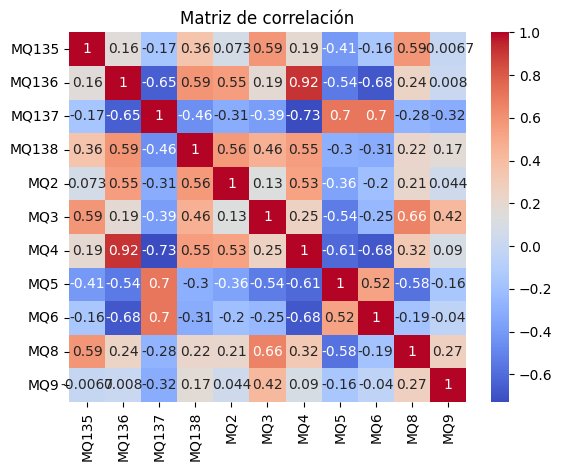

In [183]:
#Matriz de correlación
#corr(): calcula la matriz de correlación entre todas las variables numéricas del dataframe X
#heatmap(): genera un mapa de calor de la matriz de correlación:
  #annot=True muestra los valores numéricos en cada celda
  #cmap='coolwarm': para usar escala de azul para correlacion negativa y escala de rojo para correlacion positiva
matriz_correlacion = X.corr() #calculamos la matriz de correlacion
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm') #mapa de calor (cuanto mas inteso el color más cercano a 1 en valor absoluto)
plt.title('Matriz de correlación')#le ponemos titulo
plt.show()#lo enseñamos

Dentro de esta matriz de correlación tenemos el coeficiente de correlación para cada pareja de la matriz, es decir, vamos a intentar asociar parejas que aporte prácticamente la misma información porque estén correladas.

Los coeficientes de correlación van desde el -1 al 1 donde el 1 representa la máxima correlación directa, el -1 la máxima correlación indirecta y el 0 significa que no están correladas. Esto sigue el código de colores, de hecho, la leyenda de la derecha lo explica. Cuanto el color sea más intenso más correladas están, rojo para correlación directa y azul para correlación inversa.

Por consiguiente, podemos observar como las parejas más correladas (>=+-0.7) son:


*   MQ4 y MQ136: 92% de correlación
*   MQ4 y MQ137: -73% de correlación
*   MQ5 y MQ137: 70% de correlación
*   MQ6 y MQ137: 70% de correlación

Podría ser interesante hacer un modelo eliminando variables que no aporten más información o aporte información repetida, ya que es mejor un modelo más simple. Por ahora vamos a optar por probar a hacer PCA mejor. Si no viesemos buenos resultados, acudiría a probarlo.

El PCA sí es altamente recomendable hacerlo una vez hecha la partición, ya que, aun viendo la matriz de correlación solo, estamos viendo parte del test ya que estamos analizando el conjunto de datos enteros. Como he optado por probar con PCA y no con la eliminación directa de variables porque no tenemos tantas, he estudiado aquí la matriz de correlación y haré el PCA una vez dividido el conjunto de datos.

Como he comentado, quiero profundizar un poco más en la selección de características y la reducción de la dimensionalidad. Por tanto vamos a explicar el análisis de componentes principales (PCA) y luego, una vez hecha la partición, lo aplicaremos. Esta técnica reduce la cantidad de dimensiones en grandes conjuntos de datos a componentes principales que conservan la mayor parte de la información original. Selecciona las variables potencialmente correlacionadas y hace un conjunto más pequeño de variables, llamadas componentes principales. Estas componentes no son variables del conjunto en sí, si no que son nuevas variables que son combinaciones lineales de las características originales.

### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos. Puede ser mucho más alto o mucho más bajo que los demás puntos de datos. Esto puede hacer que se desvie el ajuste del modelo.

Pueden  ser errores de medición o de ejecución.

Hay más métodos paa detectar outliers, como el Z-score, pero nosotros vamos a usar uno de los métodos más comunes: método del rango intercuartílico (IQR): es una medida de dispersión estadística que se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1):
$$ IQR=Q3−Q1 $$

Donde el primer cuartil (Q1) representa el valor que deja el 25% de los datos por debajo de él y el tercer cuartil (Q3) representa el valor que deja el 75% de los datos por debajo de él. Por tanto, el IQR representa el rango en el que se encuentra el 50% central de los datos.

Ahora, tenemos que definir un umbral para considerar a una instancia outlier. Se define una cota inferior y una cota superior de la siguiente forma:

 $$Lim\_inf=Q1−1.5×IQR$$

 $$Lim\_sup=Q3+1.5×IQR$$

 Cualquiera instancia fuera de esos límites se considerará un outlier.


Vamos a estudiarlos también una vez hecha la partición.

In [184]:
#Función para detectar outliers como hemos explicadojusto arriba
def detectar_outliers_IQR(column):
    Q1 = column.quantile(0.25) #primer cuartil del 25
    Q3 = column.quantile(0.75) #cuartil del 75
    IQR = Q3 - Q1 #nos quedamos con la parte central: rango intercuartilico
    cota_inferior = Q1 - 1.5 * IQR #lim_inf
    cota_superior = Q3 + 1.5 * IQR #lim_sup
    return (column < cota_inferior) | (column > cota_superior)  #devuelve booleano


### Missing values
Ya lo hemos visto anteriormente que no había valores perdidos pero vamos a ratificarlo una vez más.

In [185]:
#Missing values (son los que son null)
print("Valores faltantes por columna:")
print(data.isnull().sum()) #vemos cuale están vacías y las sumamos para ver el total

Valores faltantes por columna:
MQ135    0
MQ136    0
MQ137    0
MQ138    0
MQ2      0
MQ3      0
MQ4      0
MQ5      0
MQ6      0
MQ8      0
MQ9      0
Cut      0
Label    0
dtype: int64


Efectivamente no hay valores perdidos. Si los hubiese tendríamos que imputarlos, es decir, calcular un valor para completarlo. Se suele utilizar la media en variables numéricas y la moda en variables categóricas. Sin embargo, lo más recomendable hubiese sido imputarlo con un modelo, como por ejemplo un KNN.

Si hubiese habido un valor faltante en la etiqueta, tendríamos que haber eliminado esa instancia porque no sabríamos como clasificarla.

### Escalado de variables

El escalado de variables es importante para algoritmos que utilizan distancias, como el KNN. Como hemos podido comprobar antes, no todas las variables numéricas están en la misma escala ni mismo rango, por lo que las variables que sean más grande tendrán más peso. Pero no queremos esto, queremos que todas tengan la misma importancia, por lo que tendremos que ponerlas en el mismo rango.

Las dos opciones más comunes para el escalado de variables es: StandardScaler y MinMaxScaler.


StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Sigue la fórmula:

$$
    z = \frac{x - \mu}{\sigma}
$$

donde

*   $x$: valor original.
*   $\mu$: media de la columna.
*   $\sigma$: desviación estándar de la columna.

Así conseguiríamos que los datos estuviesen centrados en la media alrededor de 0 y que tengan desviación típica 1. Además, podrían haber números negativos o mayores que 1, por lo que no están limitados a un rango. Esto hacer que sea menos sensibles a outliers.

Este tipo se suele utilizar cuando creemos que lso datos siguen una distribución normal o son datos simétricos.








En cuanto a MinMaxScaler: transforma los datos paar que estén en un rango, suele ser entre 0 y 1.

La fórmula que utiliza es:
$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Se usa cuando hay una distribución asimétrica o cuando no siguen distribución normal.

Esto sí es altamente recomendado hacerlo una vez hecha la partición ya que estamos directamente usando datos de test. Esto se debe a que si normalizas sabiendo una media, realmente esa media no corresponde exclusivamente al train, si no que estás sabiendo la media también de los datos de test, lo que no es correcto.

### Codificación y transformación de datos

Como hemos visto, la variable a predecir es una variable categórica. Sin embargo, muchos algoritmos no saben trabajar bien con este tipo de variables, por lo que es importante pasarla a numérica. He optado por hacer un Label encoding donde a cada categoría le asigna un número. En este caso tiene bastante sentido ya que va desde podrido a excelente, es decir, podemos clasificar numéricamente el estado de la carne. A este tipo de variables se les llama ordinales ya que tienen un orden lógico.

En conlusión, en nuestro caso hemos aplicado Label Enconding ya que es más simple, eficiente en términos de memoria y útil cuando las etiquetas tienen un orden natural.

In [186]:
#Label encoding de la variable objetivo
#LabelEncoder() crea un objeto para convertir etiquetas categoricas a numericas
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y) #ajusta el encoder de Y para transformarlas a numéricas

print("Etiquetas originales:\n", Y[:5])
print("\nEtiquetas codificadas:", Y_encoded[:5])

#Correspondencia entre etiquetas originales y codificadas
#creamos un diccionario que mapea la cat original con el valor codificado
correspondencia = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCorrespondencia entre etiquetas originales y codificadas:")
for original, codificada in correspondencia.items():
    print(f"{original} -> {codificada}")

Etiquetas originales:
 0     Excellent
1       Spoiled
2       Spoiled
3    Acceptable
4     Excellent
Name: Label, dtype: object

Etiquetas codificadas: [1 3 3 0 1]

Correspondencia entre etiquetas originales y codificadas:
Acceptable -> 0
Excellent -> 1
Good -> 2
Spoiled -> 3


Sin embargo, al ser un orden tan lógico, para interpretarlo nosotros puede ser un poco lioso. Por tanto, voy a hacer un mapeo manual para que tenga más sentido:

In [187]:
#Mapeo manual de menor a mayor
mapeo_manual = {
    "Excellent": 3,
    "Good": 2,
    "Acceptable": 1,
    "Spoiled": 0
}

#Lo aplico
Y_encoded = pd.Series(Y).map(mapeo_manual).values

#Imprimo resultados
print("Etiquetas originales:\n", Y)
print("Etiquetas codificadas:", Y_encoded)

Etiquetas originales:
 0        Excellent
1          Spoiled
2          Spoiled
3       Acceptable
4        Excellent
           ...    
2395    Acceptable
2396       Spoiled
2397       Spoiled
2398    Acceptable
2399    Acceptable
Name: Label, Length: 2400, dtype: object
Etiquetas codificadas: [3 0 0 ... 0 1 1]


### Desbalanceo de datos
Hemos visto antes que no estaban desbalanceados porque tenían igual frecuencia todas las clase, pero vamos a comprobarlo visualmente. Si hubiese desblanceo, podríamos haber aplicado técnicas como SMOTE para hacer ejemplos sintéticos de la clase minoritaria.

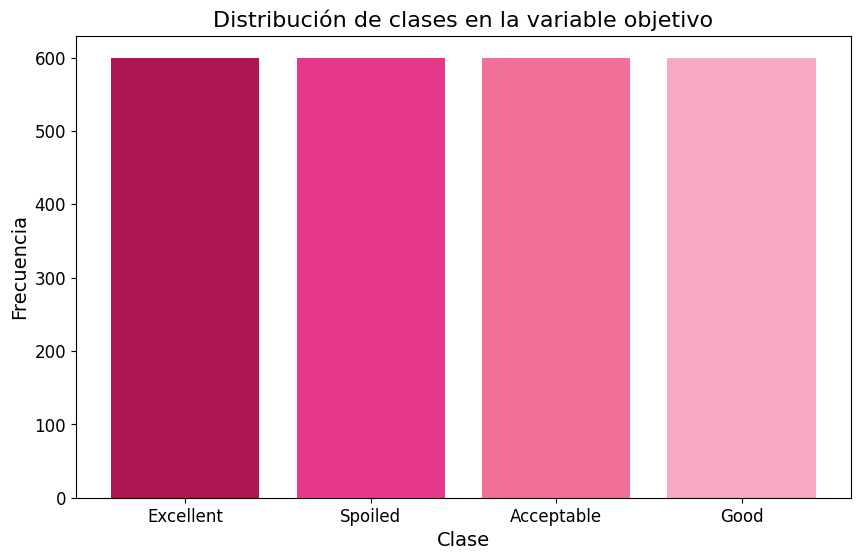

In [188]:
#Convertimos el dataset a un dataframe
data = pd.DataFrame(Y, columns=["Label"])

#Contamos la frecuencia de cada clase
class_counts = data["Label"].value_counts()

#Creamos el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color=["#AC1754", "#E53888", "#F37199", "#F7A8C4"])
plt.title("Distribución de clases en la variable objetivo", fontsize=16)
plt.xlabel("Clase", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Efectivamente podemos comprobar como está lo máximo balanceado posible.

## Técnicas de validación experimental y métricas de evaluación del rendimiento

Las principales técnicas de validación experimental que voy a valorar para aplicar son:


*   **Hold-out:** dividimos en dos partes (train y test). Usamos el train para entrenar el modelo y que aprenda y el test para evaluar el rendimiento total del modelo. Vamos a probar a hacer una partición de los datos del 80% train y 20% test. Sus ventajas es que es simple y bajo coste computacional, pero no utiliza todos los datos para aprender, por lo que dependerá de su buen funcionamiento el tamaño del dataset.
*   **Cross-validation con kfold:** se dividen los datos en k particiones del mismo tamaño. El modelo se entrena k veces, usando k-1 particiones para entrenar y 1 partición para validar. Al final, el rendimiento final es el promedio de las métricas obtenidas en cada iteración. Con respecto al anterior, usa todos los datos para entrenar y validar y es más robusto. Sin embargo, computacionalmente es más costoso. En este caso, vamos a probar con un 5-fold.
*   **Cross-validation estratificado:** usa la misma técnica que el anterior, pero además asegura que cada fold tenga la misma proporción de clases que el conjunto de datos original. Esta técnica se suele usar y suele ser útil cuando hay desbalanceo de clases. Para nuestro problema lo vamos a utilizar porque aunque está muy balanceado, quiero que en cada fold se mantenga la misma proporción en cada clase.
*   **Cross-validation con leave-one-out:** es un caso extremo de k-fold donde en cada iteración se usa una muestra como conjunto de validación y las n-1 muestras restantes como conjunto de entrenamiento. Se repite este proceso n veces, una para cada muestra. Se suele utilizar para conjuntos extremadamente pequeños de datos porque es muy costoso computacionalmente, por lo que en este caso no lo vamos a utilizar.
*   **Bootstrapping:** se generan múltiples conjuntos de entrenamiento muestreando con reemplazo del conjunto de datos original y se evalúa el modelo en las muestras no seleccionadas (out-of-bag). Al final, el rendimiento final es el promedio de las métricas obtenidas en cada iteración. También se utiliza para dataset pequeños, por lo que no nos planteamos utilizarlo.



## Hold-out

In [189]:
#Dividimos los datos en entrenamiento (80%) y prueba (20%)
#train_test_split(): divide los datos en conjuntos con la el porcentaje que le das por parametro
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=19)

#Miramos los tamaños de los conjuntos
print(f"Entrenamiento: {X_train.shape[0]} instancias")
print(f"Prueba: {X_test.shape[0]} instancias")

Entrenamiento: 1920 instancias
Prueba: 480 instancias



Outliers en train
MQ135: 27 outliers (1.41%)
MQ136: 201 outliers (10.47%)
MQ137: 0 outliers (0.00%)
MQ138: 28 outliers (1.46%)
MQ2: 116 outliers (6.04%)
MQ3: 72 outliers (3.75%)
MQ4: 102 outliers (5.31%)
MQ5: 35 outliers (1.82%)
MQ6: 461 outliers (24.01%)
MQ8: 33 outliers (1.72%)
MQ9: 0 outliers (0.00%)


<Figure size 1200x600 with 0 Axes>

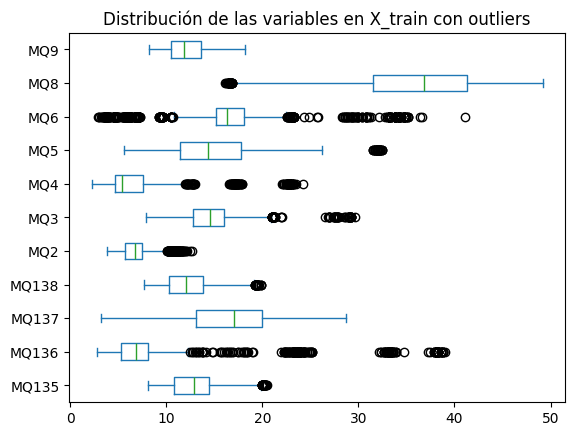

In [190]:
# usando la funcion declarada para detectar outliers, detectamos SOLO en train
outliers_train = {}
for col in X_train.columns: #miramos en cada columna si hay outliers
    outliers_train[col] = detectar_outliers_IQR(X_train[col])

# resultados por columna, calculamos porcentajes de los numeros obtenidos
print("\nOutliers en train")
for col, mask in outliers_train.items():
    n_outliers = mask.sum()
    porcentaje = (n_outliers / len(X_train)) * 100
    print(f"{col}: {n_outliers} outliers ({porcentaje:.2f}%)")

# boxplot de todas las variables dibujando tambien los outliers
plt.figure(figsize=(12, 6))
X_train.plot(kind='box', vert=False)
plt.title('Distribución de las variables en X_train con outliers')
plt.show()

Vemos como hay varias variables donde hay bastante porcentaje de outliers, de hecho, si nos fijamos en MQ6, vemos como tiene casi un 24% de outliers. Eso es bastante y creo que vamos a perder mucha información si quitamos los outliers. Por tanto, por ahora y a no ser que sea necesario viendo los resultados, vamos a optar por no quitar outliers.

Además, esto concuerda con el histograma de las variables numéricas porque si miramos el de MQ6 vemos como se concentran casi todas las instancias en el centro-izquierda y es donde mayor número hay. Esto lo podemos ver en este último boxplot y corroborar ya que tenemos una concetración de ejemplos en la mitad izquierda y los demás los considera outliers.

Viendo las distribuciones, hay muchos sensores que son bastante asimétricos, por lo que voy a utilizar el segundo escalado que hemos explicado:

In [191]:
# Vamos a aplicar ahora la formalización MinMax (aprendiendo solo del train)
# MinMaxScaler(): escala en [0,1]
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)  #aprende los parametros min/max de train y los transforma
X_test_normalized = scaler.transform(X_test)       # aplicamos la misma transformación a test

#Comprobamos:
print("Normalización (Train): Min =", X_train_normalized.min(), "Max =", X_train_normalized.max())

Normalización (Train): Min = 0.0 Max = 1.0000000000000002


Voy a hacer una explicación más detallada de por qué es importante normalizar después de hacer la normalización como estamos aplicando.
La razón es para evitar *data leakage* o bien conocido como fuga de datos, que es lo que ocurriría si usaramos información del conjunto prueba para preprocesar los datos. Por tanto, primero hemos dividido en train y test. Después, hemos aprendido los parámetros de normalización min y max solo del train. Por último, hemos aplicado esos mismos parámetros a test.

Esto se hace ya que si normalizáramos antes de dividir, test estaría influenciados por estadísticos de todos los datos. Como consecuencia, el rendimiento sería optimista e irreal, porque el modelo habría "visto" indirectamente datos de test durante el preprocesamiento.

Viendo los resultados de la normalización, efectivamente el train se queda en el intervalo $[0,1]$, redondeando.

Por último, no es correcto analizar el conjunto de test. Si no estaríamos haciendo *Data Snooping*.

Vamos ahora a hacer una reducción de características y probaremos a entrenar con todas las características y solo con las obtenidas después de hacer PCA. Compararemos resultados.


Número de componentes seleccionados: 7
Varianza explicada acumulada: [0.43724928 0.61040525 0.73517929 0.83182611 0.89051157 0.92516897
 0.95207821]


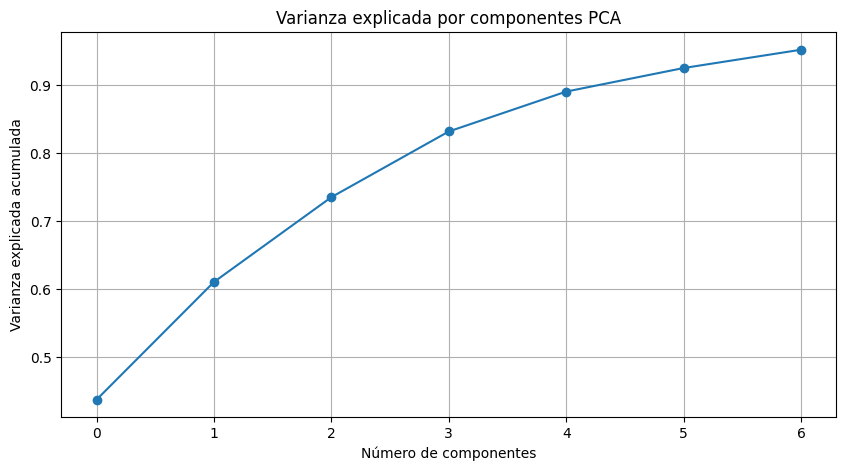

In [192]:
# PCA reteniendo el 95% de varianza (ajuste solo en train)
#PCA(): crea objeto PCA con las reduccion de variables con un 95% de varianza
pca = PCA(n_components=0.95, random_state=1)
X_train_pca = pca.fit_transform(X_train_normalized)  # se ajusta y transforma solo en train
X_test_pca = pca.transform(X_test_normalized)        # mientras que en test solo transformación en test

# Resultados de PCA
print("\nNúmero de componentes seleccionados:", pca.n_components_)
print("Varianza explicada acumulada:", np.cumsum(pca.explained_variance_ratio_))

# Gráfico de varianza explicada
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes") #nombre a los ejes
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por componentes PCA")
plt.grid()
plt.show()

Vemos como ha reducido la dimensionalidad de 11 a 7 variables. Después probaremos con un modelo a ver si mejora comparado con utilizar todas las variables.

Analizando más en detalle el gráfico: este gráfico muestra la varianza explicada acumulada en función del número de variables principales seleccionadas. Vemos como con la primera variable se explica sobre el 45% de la varianza total. Después, esto se va acumulando y cada variable va sumando más porcentaje. Vemos como solo con las dos primeras variables llegan al 60% de la varianza total y con cuatro sobre un 84%. Con esto podemos concluir que la información está bastante condensada con estas 7 variables ya que llega casi al 95% de la varianza. Esto nos puede indicar que podemos reducir la dimensionalidad sin perder mucha información. Veremos a ver como funciona el modelo antes esta reducción.

## 5-fold
Hacemos 5 particiones.

In [193]:
#lo he hecho junto al modelo correspondiente y lo he explicado arriba

## Modelos de aprendizaje automático (mínimo uno de ensemble)


Voy a explicar las métricas que voy a utilizar: acuraccy, precision, recall y f1. Sin embargo, están definidas en clasificaciń binaria, por lo que las tenemos que extender a clasificación multiclase.

La accuracy mide el porcentaje de predicciones correctas sobre el total de instancias. Se calcula como:

$$ \text{Accuracy} = \frac{\text{Numero de predicciones correctas}}{\text{Total de muestras}} $$


La precisión mide cuántos de los ejemplos clasificados en una clase específica realmente pertenecen a esa clase. Se calcula como:

$$ \text{Precision} = \frac{TP}{TP + FP}$$

donde:


*   TP (True Positives) son las instancias correctamente clasificadas en la clase.
*   FP (False Positives)son las instancias incorrectamente clasificadas en la clase



Para un problema multiclase, hemos utilizado el parámetro "weighted" que calcula la precisión de cada clase y pondera por el número de instancias en cada una:

$$ \text{Precision}_\text{weighted} = \sum_{i=1}^{n} w_i \cdot \text{Precision}_i, \quad \text{donde } w_i = \frac{N_i}{N}$$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.



El recall/sensibilidad mide cuántas instancias de una clase determinada fueron correctamente identificadas. Se calcula como:

$$ \text{Precision} = \frac{TP}{TP + FP} $$

donde:


*   TP (true positives) son las instancias correctamente clasificadas en la clase.

*   FN (false negatives) son las instancias de la clase que fueron clasificadas incorrectamente como otra.

Como en precisión, "*weighted*" pondera los valores de cada clase por su número de muestras:

$$ \text{Recall}_\text{weighted} = \sum_{i=1}^{n} w_i \cdot \text{Recall}_i, \quad \text{donde } w_i = \frac{N_i}{N} $$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.






El F1-score es la media armónica entre la precisión y el recall. Se calcula como:
$$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

Esto equilibra los valores de precisión y recall, asegurando que el modelo no solo sea preciso sino también capaz de identificar correctamente todas las clases.

Al igual que las anteriores utilizamos el parámetro "weighted":

$$ F1_\text{weighted} = \sum_{i=1}^{n} w_i \cdot F1_i, \quad \text{donde } w_i = \frac{N_i}{N} $$

donde:


*  $N_i$ es el número de instancias de la clase $i$.
*   $N$ es el número total de muestras.




Para reutilizar código, he hecho una función para evaluar el modelo con las métricas que creo convenientes. Así después solo tendremos que llamar a esta función y a la del modelo corespondiente. Esta función será solo para holdout.

In [194]:
def evaluar_modelo(model, X_train, y_train, X_test, y_test):
  #Para poder comparar la rapidez, medimos el tiempo de ejecución del entrenamiento
  start_time = time.time()

  #Entrenamos el modelo con el conjunto de entrenamiento
  model.fit(X_train, y_train)

  # tiempo de entrenamiento
  end_time = time.time() #guardamos el final
  training_time = end_time - start_time #la diferencia es el tiempo de entrenamiento

  #Hacemos la predición en el conjunto de train
  y_train_pred = model.predict(X_train)

  #Hacemos la predición en el conjunto de test
  y_test_pred = model.predict(X_test)

  #métricas en el conjunto de train
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_precision = precision_score(y_train, y_train_pred, average="weighted")
  train_recall = recall_score(y_train, y_train_pred, average="weighted")
  train_f1 = f1_score(y_train, y_train_pred, average="weighted")

  #métricas en el conjunto de prueba
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred, average="weighted")
  test_recall = recall_score(y_test, y_test_pred, average="weighted")
  test_f1 = f1_score(y_test, y_test_pred, average="weighted")

  # Imprimimos resultados de TRAIN
  print("\nMétricas en el conjunto de train:")
  print(f"  - Tasa de acierto (Accuracy): {train_accuracy:.4f}")
  print(f"  - Precisión (Precision): {train_precision:.4f}")
  print(f"  - Sensibilidad (Recall): {train_recall:.4f}")
  print(f"  - F1-Score: {train_f1:.4f}")

  #Imprimimos los resultados en test
  print("\nMétricas en el conjunto de prueba:")
  print(f"  - Tasa de acierto (Accuracy): {test_accuracy:.4f}")
  print(f"  - Precisión (Precision): {test_precision:.4f}")
  print(f"  - Sensibilidad (Recall): {test_recall:.4f}")
  print(f"  - F1-Score: {test_f1:.4f}")

  print(f"\nTiempo de entrenamiento: {training_time:.4f} segundos")

  # Matriz de confusión en el conjunto de prueba
  #cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1, 2, 3])  #nos aseguramos que es el orden en el que hemos mapeado la variable objetivo
  cm = confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Spoiled", "Acceptable", "Good", "Excellent"], yticklabels=["Spoiled", "Acceptable", "Good", "Excellent"])
  plt.xlabel("Predicciones")
  plt.ylabel("Valores reales")
  plt.title("Matriz de confusión")
  plt.show()

  return { #devolvemos las metricas para despues analizarlas en el analisis final
      'train_metrics': {
          'accuracy': train_accuracy,
          'precision': train_precision,
          'recall': train_recall,
          'f1': train_f1
      },
      'test_metrics': {
          'accuracy': test_accuracy,
          'precision': test_precision,
          'recall': test_recall,
          'f1': test_f1
      },
      'training_time': training_time
  }

Ahora hacemos la función para un 5-fold:

In [195]:
def evaluar_modelo_kfold(model, X, y, n_splits=5, random_state=19):
  kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state) #crea las particiones estratificadas con un barajeo
  scaler = MinMaxScaler() #normalizamos

  #almacenamos las métricas de cada fold
  train_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
  test_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
  training_times = []
  confusion_matrices = []

  for i, (train_index, test_index) in enumerate(kf.split(X, y)):
      #normalizamos independiente para cada fold
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y[train_index], y[test_index]

      X_train_scaled = scaler.fit_transform(X_train) #en train si apredemos y aplicamos
      X_test_scaled = scaler.transform(X_test) #al test solo se lo aplicamos

      #train
      start_time = time.time() #medimos el tiempo de inicio
      model.fit(X_train_scaled, y_train)
      training_time = time.time() - start_time #tiempo total transcurrido
      training_times.append(training_time)

      #test
      y_train_pred = model.predict(X_train_scaled)
      y_test_pred = model.predict(X_test_scaled)

      #métricas train
      train_metrics['accuracy'].append(accuracy_score(y_train, y_train_pred))
      train_metrics['precision'].append(precision_score(y_train, y_train_pred, average='weighted'))
      train_metrics['recall'].append(recall_score(y_train, y_train_pred, average='weighted'))
      train_metrics['f1'].append(f1_score(y_train, y_train_pred, average='weighted'))

      #métricas test
      test_metrics['accuracy'].append(accuracy_score(y_test, y_test_pred))
      test_metrics['precision'].append(precision_score(y_test, y_test_pred, average='weighted'))
      test_metrics['recall'].append(recall_score(y_test, y_test_pred, average='weighted'))
      test_metrics['f1'].append(f1_score(y_test, y_test_pred, average='weighted'))

      #matriz de confusión para este fold
      confusion_matrices.append(confusion_matrix(y_test, y_test_pred))

      #imprimimos los resultados por cada fold
      print(f"\nFold {i+1}/{n_splits}:")
      print(f"  Test Accuracy: {test_metrics['accuracy'][-1]:.4f}")
      print(f"  Time: {training_time:.2f}s")

  #matriz de confusión acumulada (sumamos todos los folds)
  cm_acumulada = np.sum(confusion_matrices, axis=0)

  #visualizamos matriz de confusión
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm_acumulada, annot=True, fmt="d", cmap="Blues",
              xticklabels=["Spoiled", "Acceptable", "Good", "Excellent"],
              yticklabels=["Spoiled", "Acceptable", "Good", "Excellent"])
  plt.xlabel("Predicciones")
  plt.ylabel("Valores reales")
  plt.title("Matriz de confusión agregada (5-Fold CV)")
  plt.show()

  #calculamos las medias
  avg_train_metrics = {k: np.mean(v) for k, v in train_metrics.items()}
  avg_test_metrics = {k: np.mean(v) for k, v in test_metrics.items()}
  avg_time = np.mean(training_times)

  #resultados finales
  return {
      'train_metrics': avg_train_metrics,
      'test_metrics': avg_test_metrics,
      'training_time': avg_time,
      'confusion_matrix': cm_acumulada,
      'fold_details': {
          'train': train_metrics,
          'test': test_metrics,
          'times': training_times
      }
  }

Vamos a aplicar varios modelos para ver que características tienen y ver cuales funcionan mejor.



*   Regresión logística
*   KNN
*   RandomForest
*   Gradient Boosted



### Regresión logística
Para aplicar el modelo de regresión logística a clasificación multiclase leemos en la documentación de scikit-learn(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html):

*For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss. ‘liblinear’ and ‘newton-cholesky’ only handle binary classification but can be extended to handle multiclass by using OneVsRestClassifier.*

Por lo tanto, vamos a probar con *‘lbfgs’*.

La regresión logística multinomial o regresión softmax generaliza la regresión logística para clasficación binaria, sin tener que entrenar y combinar varios clasificadores binarios.

Dada una instancia $x$, el modelo de regresión softmax calcula primero una puntuación $s_k(x)$ para cada clase $k$ y, a continuación,
estima la probabilidad de cada clase aplicando la función softmax
(también denominada exponencial normalizada) a las puntuaciones. La
ecuación para calcular $s_k(x)$ es igual que la ecuación para la predicción de regresión lineal:

$$ S_k(x) = \left( \Theta^{(k)} \right)^T x $$

Cada clase tiene su propio vector de parámetros $\Theta^{(k)}$

Una vez que hemos calculado la puntuación de cada clase para la instancia $x$, podemos estimar la probabilidad $p_k$ de que la instancia pertenezca a la clase $k$ ejecutando las puntuaciones a través de la función softmax:
 $$ \hat{p}_k = \sigma(s(x))_k = \frac{\exp\left(s_k(x)\right)}{\sum_{j=1}^K \exp\left(s_j(x)\right)} $$

La función calcula el exponencial de cada puntuación y luego las normaliza (dividiendo por la suma de todos los exponenciales). Las puntuaciones se llaman logits o log-odds.

Al igual que el clasificador de regresión logística, por defecto el
clasificador de regresión softmax predice la clase con la probabilidad
estimada más alta. Además, intentamos minimizar la función de coste llamada entropía cruzada.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.7870
  - Precisión (Precision): 0.7937
  - Sensibilidad (Recall): 0.7870
  - F1-Score: 0.7899

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.8146
  - Precisión (Precision): 0.8199
  - Sensibilidad (Recall): 0.8146
  - F1-Score: 0.8166

Tiempo de entrenamiento: 0.0376 segundos


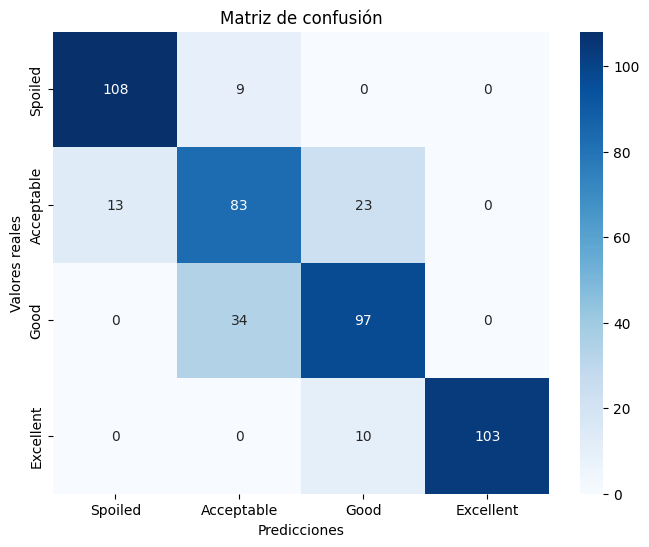

In [196]:
#modelo de Regresión Logística para clasificacion multiclase
resultados_reg_log=evaluar_modelo(
    LogisticRegression(solver='lbfgs',
                       max_iter=1000, #añadimos mas iteraciones para asegurarnos la convergencia
                       random_state=19), #inicializamos la semilla para que siempre que lo ejecutemos nos de el mismo resultado
    X_train_normalized, y_train, X_test_normalized, y_test)

Una de las métricas que hemos utilizado es la matriz de confusión ya que nos ayuda a ver cuantos errores ha cometido nuestro modelo y en qué clase se equivoca más. Normalmente, la más común es la matriz de confusión binaria donde se mide los verdaderos positivos (TP), los falsos positivos (FP), falsos negativos (FN) y verdaderos negativos (VN). Sin embargo, como estamos ante un problema de clasificación multiclase, he implementado una matriz donde las filas y columnas sean las 4 clases a clasificar.

Vemos en las diagonales las instancias que se ha clasificado correctamente. En general, vemos como las etiquetas aceptable y good son las que más confunde y puede tener sentido ya que son las más parecidas en cuanto al aspecto de la carne. Además, las más acertadas son podrida y excelente, lo cual es lo más interesante ya que son los extremos y suele tener más importancia saber predecir cuando una carne esta mala y no se puede comer a cuando una carne esta aceptable.

En la sección de análisis comentamos más en detalle las otras métricas y comparamos con el resto de modelos.

Vamos a probar ahora a entrenar con el PCA calculado antes para ver si mejora o empeora. Lo unico que cambiamos es que en vez de entrenan con X_train_normalized y test con X_test_normalized, lo haremos con X_train_pca y X_test_pca.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.7562
  - Precisión (Precision): 0.7504
  - Sensibilidad (Recall): 0.7562
  - F1-Score: 0.7518

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.7667
  - Precisión (Precision): 0.7623
  - Sensibilidad (Recall): 0.7667
  - F1-Score: 0.7633

Tiempo de entrenamiento: 0.0202 segundos


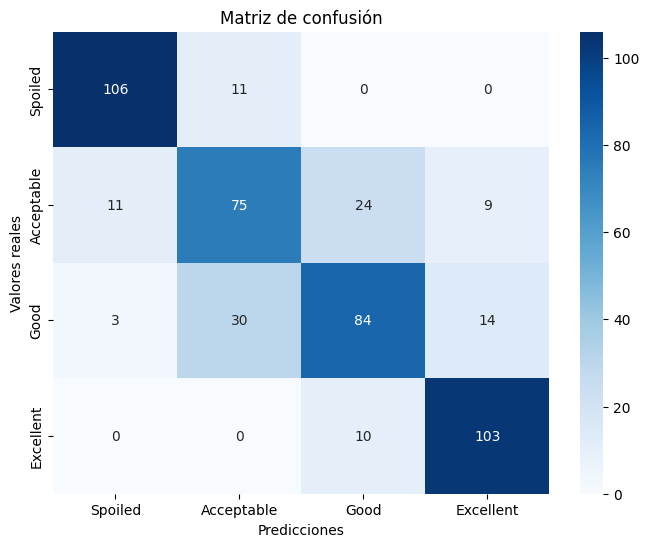

In [197]:
# modelo de Regresión Logística para clasificacion multiclase con PCA
resultado_reg_log_pca=evaluar_modelo(
    LogisticRegression(solver='lbfgs', max_iter=1000, random_state=19),
    X_train_pca, y_train, X_test_pca, y_test
)
#el X_train_pca se ha normalizado antes de aplicar pca, por tanto ahora tambien esta normalizado

Vemos como empeora tanto las métricas como la matriz de confusión por lo que no es conveniente en este problema hacer reducción de la dimensionalidad y a partir de ahora vamos a trabajar con todas las variables, ya que de por sí no son tantas y pueden ser todas aportadoras de información.

En comparación con train, los resultados son muy parecidos asi que no es para nada sobrejauste.

Voy a probar ahora a hacer un 5-fold estratificado para que en cada fold se mantenga la misma proporción de cada clase (es decir, la misma por como está balanceado el problema):


Fold 1/5:
  Test Accuracy: 0.7833
  Time: 0.03s

Fold 2/5:
  Test Accuracy: 0.7979
  Time: 0.04s

Fold 3/5:
  Test Accuracy: 0.7854
  Time: 0.03s

Fold 4/5:
  Test Accuracy: 0.8042
  Time: 0.03s

Fold 5/5:
  Test Accuracy: 0.8229
  Time: 0.03s


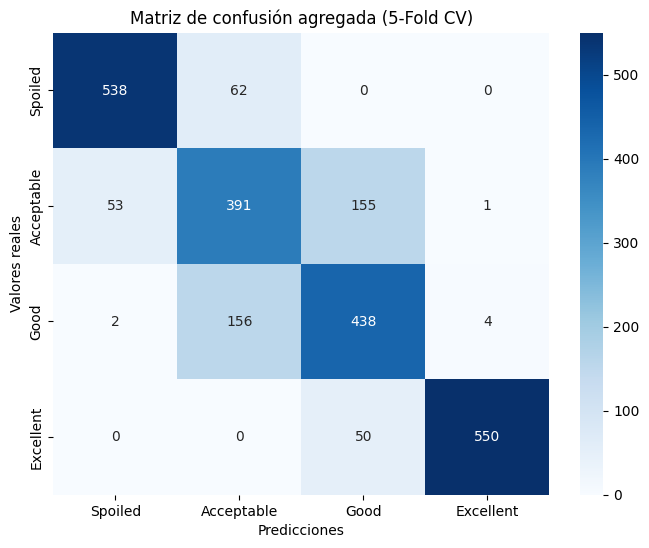

In [198]:
#regresion logistica con kfold
resultados_kfold_regresion = evaluar_modelo_kfold(
    LogisticRegression(solver='lbfgs', max_iter=1000, random_state=19),
    X,
    Y_encoded
)

Vemos como es prácticamente los mismos resultado que con respecto a hacer hold-out. Además, al igual que el hold-out se clasifica en las clases que son más parecidas y que son contiguas: aceptable y good. Esto nos indica que aunque falle, los fallos no son fatídicos.

Si nos fijamos, en este caso la mtriz de confusión llega hasta los 600 por fila. Esto es porque hemos ido acumulando la matriz de cada fold porque se usa todos los datos para entrenar.

### KNN
El KNN (k-nearest neighbors), o el algoritmo de los K vecinos más cercanos, es un algoritmo de clasificación por analogía. El funcionamiento es muy simple y se asemeja mucho al comportamiento humano: si queremos clasificar un nuevo ejemplo, buscamos en nuestra memoria los ejemplos más parecidos a él y le asignamos la clase más común entre esos ejemplos (el equivalente humano es: si veo un animal sé que es un perro porque se parece mucho a otros perros que ya he visto antes). Se encuadraría dentro del paradigma lazy donde el trabajo se retrasa todo lo posible. El modelo es la propia BD.
El concepto de similitud se traduce en calcular distancias. Cuanto menor sea la distancia entre dos ejemplos, más parecidos serán, donde utilizaremos la distancia euclídea (aunque hay más ejemplos de distancias como la Manhattan, Minkowski...). El nuevo ejemplo se clasificará según la clase mayoritaria de los k ejemplos más cercanos.

Las principales características de este algoritmo son: robusto frente al ruido, eficaz, válido para clasificación y predicción numérica, ineficiente en memoria (almacena toda la BD), hay que hacer selección previa de características, inferencia sobre cada dato es costosa, no genera un modelo para interpretar o generalizar un problema y es un algoritmo estable.

Al ser un algoritmo basado en distancias, tendremos que normalizar obligatoriamente antes las variables para que todas tengan el mismo peso.

Por tanto, vamos a usar el X_normalized (normalización de variables) y Y_enconded (la variable objetivo la hemos pasado a numérica).


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9979
  - Precisión (Precision): 0.9979
  - Sensibilidad (Recall): 0.9979
  - F1-Score: 0.9979

Tiempo de entrenamiento: 0.0048 segundos


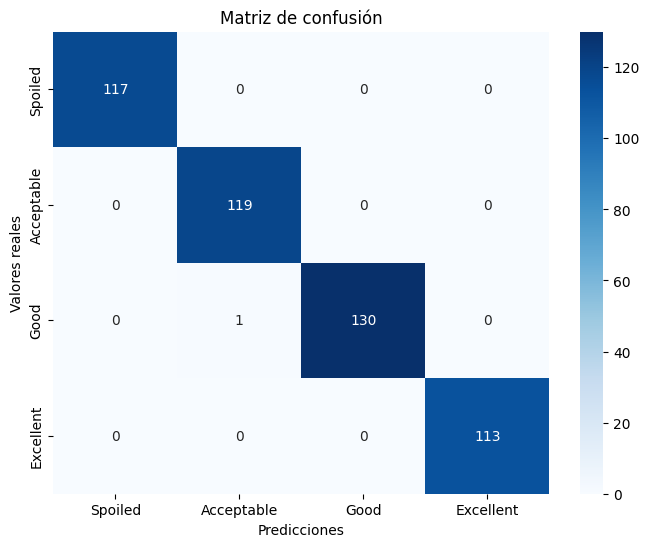

In [199]:
#KNN con hold-out hecho anteriormente
resultados_knn=evaluar_modelo(
    KNeighborsClassifier(n_neighbors=5),
    X_train_normalized, y_train, X_test_normalized, y_test)

El train lo predice al 100%, por lo que podríamos pensar que estamos ante un claro ejemplo de sobreajuste, sin embargo, vemos como en test los predice todos menos solo una instancia. Esto nos dice que este modelo se ajusta perfectamente a nuestro problema. Además, la instancia mal clasificada es entre aceptable y bien, que al igual que antes, creo que no es el fallo más grave ya que no estás clasificando una carne que realmente está podrida en que está comestible.

### Random Forest
Los dos siguientes algoritmos pertenecen a una misma idea: inducir $n$ clasificadores (pueden estar basados en distintas técnicas: reglas, árboles…) en vez de solo uno. Son los más exitosos. Se usa cuando los clasificadores individuales son malos por sí solos, luego combinan $n$ predicciones.

El algoritmo de Random Forest está dentro de la técnica de Bagging (de hecho es el algoritmo más famoso en este marco), que consiste en entrenar varios clasificadores independientes y combinar sus predicciones. Cada clasificador se entrena con una parte aleatoria del conjunto de entrenamiento, y se promedian las predicciones de todos los clasificadores. Funciona bien con algoritmos inestables (pequeño cambio en el set de entrenamiento provoca grandes cambios en la predicción). El algoritmo hace una selección aleatoria de un conjunto muy pequeño de variables para elegir de ellas el atributo que construye el árbol, sin poda. La aleatoriedad en la selección de ejemplos y características hace que los árboles sean distintos entre sí, y si la cantidad es lo suficientemente grande, el conjunto de árboles será robusto y generalizable.



Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Tiempo de entrenamiento: 0.4930 segundos


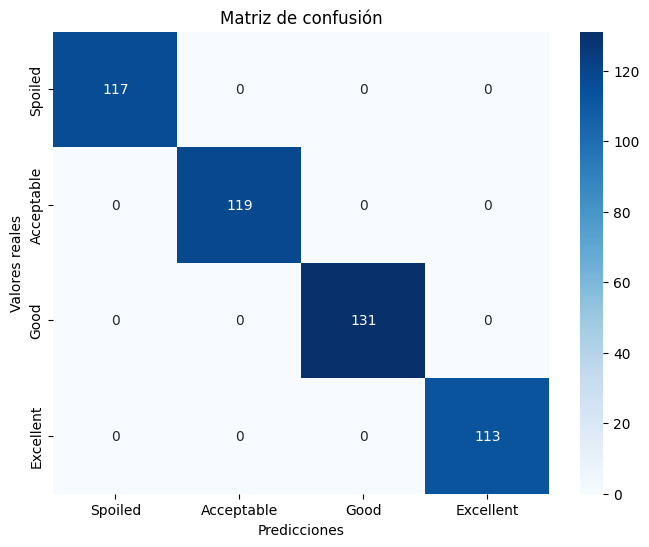

In [200]:
#Modelo Random Forest
resultados_random_forest=evaluar_modelo(
    RandomForestClassifier(random_state=19),
    X_train_normalized, y_train, X_test_normalized, y_test)

Vemos como lo predice a la perfección, no se equivoca ni en una instancia.

### Gradient Boosted

Los algoritmos de boosting van un paso más allá que los de bagging. Se busca combinar también muchos clasificadores débiles, pero en lugar de entrenarlos simultáneamente sobre distintas partes del conjunto, se entrenan secuencialmente, de forma que cada clasificador se entrena para corregir los errores del anterior. En cada iteración, se entrena el clasificador y se ve dónde se ha equivocado más. En la siguiente iteración, el próximo clasificador se entrenará dando más peso a los datos donde el anterior cometió más errores. Al final, se combinan las predicciones de todos los clasificadores.

Un algoritmo de boosting es Gradient Boosting. Este algoritmo entrena también árboles de decisión donde en cada paso de la función de coste se calcula el gradiente, que indica la dirección en la que se debe mover el clasificador para minimizar el error. El algoritmo se mueve en esa dirección, y se entrena un nuevo árbol para corregir los errores del anterior. La predicción final se obtiene combinando las predicciones de todos los árboles, teniendo en cuenta las correcciones que va aplicando cada uno.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Tiempo de entrenamiento: 2.7449 segundos


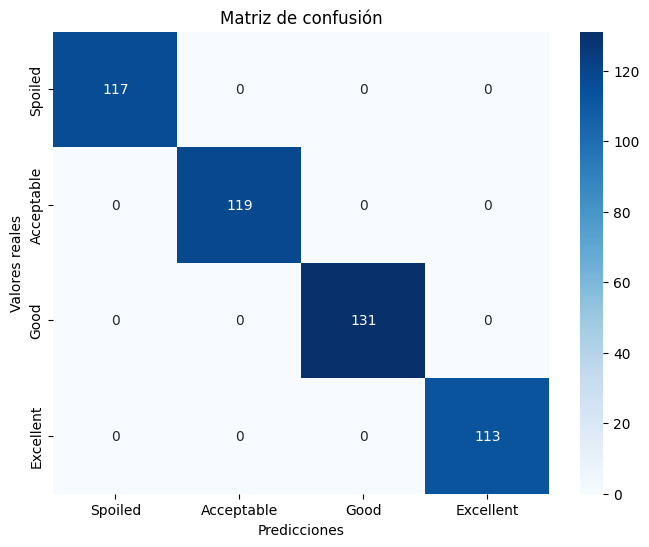

In [201]:
#Modelo Gradient Boosting
resultados_gradient_boosting=evaluar_modelo(
    GradientBoostingClassifier(random_state=19),
    X_train_normalized, y_train, X_test_normalized, y_test
)

Al igual que el anterior, lo predice a la perfección. Vemos que son algoritmos muy potentes y los datos deben de estar muy bien filtrados y preparados.

## Selección de hiperparámetros
Incluyendo el tipo de regularización a usar.


Hiperparámetros de los modelos elegidos:
*   Regresión logística: penalty (tipo de regularización, c (inverso de la fuerza de regularacion, solver (algoritmo de regularizacion), max_iter (numero maximo de iteraciones que por defecto es 100) y class_weight (ajustar los pesos automaticamente o das las clases con igual peso).
*   KNN: k (número de vecinos), p (p=1 es Manhattan, p=2 Euclidiana), weigths (ponderación de los vecino: uniform (todos los vecinos tienen igual peso) y distance (ponderacion donde el mas cercano es el más pesado)), metric...
*   Random Forest: n_estimators (números de árboles en el bosque), max_depth (profundida máxima de cada árbol), max_depth (número mínimo de muestras requeridas para dividir un nodo), min_samples_leaf (número mínimo de muestras requeridas en cada hoja), max_features (número máximo de características a considerar al buscar la mejor división)...
* Gradient Boosting: n_estimators (número de árboles), learning_rate, max_depth (máxima profundidad de cada árbol), min_samples_split (número mínimo de muestras requeridas para dividir un nodo), min_samples_leaf (número mínimo de muestras requeridas en cada hoja), subsample (fracción de muestras utilizadas para entrenar cada árbol)...

En cuanto a la regresión logística multiclase, vamos a tocar el tipo de regularización.

Una buena forma de reducir el sobreajuste es regularizar el modelo (es decir, restringirlo): cuantos menos grados de
libertad tenga, más difícil será que sobreajuste los datos. Para un modelo lineal, la regularización se consigue
normalmente restringiendo los pesos del modelo.

Las más conocidas regularizaciones son la Ridge (L2) o la Lasso (L1). Por defecto, está la regulariación L2 (Ridge) en nuestra regresión softmax que hemos hecho. En esta regularización, se añade un término de regularización al MSE. Esto obliga al algoritmo de aprendizaje no sólo a ajustarse a los datos, sino también a mantener las ponderaciones del modelo lo más pequeñas posible. El hiperparámetro $\alpha$ controla el grado de regularización del modelo. Si $\alpha=0$, la regresión ridge es simplemente una regresión lineal. Si $\alpha$ es muy grande, todas las ponderaciones terminan muy cerca de cero y el resultado es una línea plana que pasa por la media de los datos.


$$ J(\theta) = \mathrm{MSE}(\theta) + \frac{\alpha}{m} \left( \sum_{i=1}^{n} \theta_{i}^{2} \right) $$

Vamos a probar a cambiar a la regularización L1 (lasso, regresión del mínimo absoluto y del operador de selección) para evitar el sobreajuste y mejorar el acuraccy, aunque dependerá de nuestro problema.

Al igual que la regresión ridge, añade un término de regularización a la función de
costes, pero utiliza la norma $l_1$ del vector de pesos en lugar del cuadrado de la norma $l_2$.

Vemos que la norma $l_1$ se multiplica por $2\alpha$, mientras que la norma $l_2$ se multiplica por $\alpha/m$ en la regresión ridge. Estos factores se eligieron para garantizar que el valor óptimo de $\alpha$ es independiente del tamaño del conjunto de entrenamiento: diferentes normas conducen a diferentes factores.

$$ J(\theta) = \mathrm{MSE}(\theta) + 2\alpha \sum_{i=1}^{n} |\theta_i| $$

Una característica importante de la regresión lasso es que tiende a eliminar las ponderaciones de las características menos importantes (es decir, las pone a
cero).

Viendo en la documentación, el algoritmo de optimizacion *lbfgs* (bueno para problemas pequeños/medianos) solo admite la regularización l2, por lo que voy a cambiar también de algoritmo a *liblinear* (bueno para datasets pequeños). Así podré cambiar el tipo de regularización a l1. Además, voy a bajar el número de iteraciones para ver si sigue convergiendo bien.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.8260
  - Precisión (Precision): 0.8219
  - Sensibilidad (Recall): 0.8260
  - F1-Score: 0.8231

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.8354
  - Precisión (Precision): 0.8333
  - Sensibilidad (Recall): 0.8354
  - F1-Score: 0.8322

Tiempo de entrenamiento: 0.1659 segundos


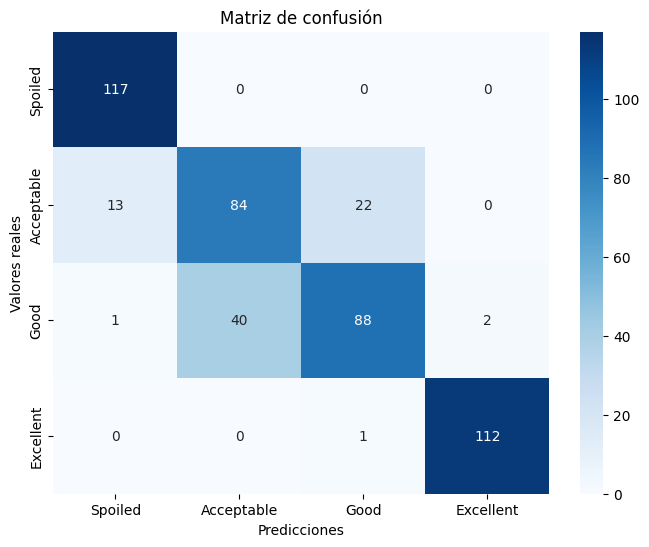

In [202]:
#modelo de Regresión Logística para clasificacion multiclase con lasso
resultados_reg_log_lasso=evaluar_modelo(
    LogisticRegression(solver='liblinear',
                       penalty='l1', #l1 es lasso
                       max_iter=100, #rebajamos a 100
                       random_state=19),
    X_train_normalized, y_train, X_test_normalized, y_test)


Vemos como ha mejorado un poco en test, alrededor del 5%. Sigue convergiendo aun poniendo 100 iteraciones de máximo y la regularización l1 parece haber ayudado a la mejora. Además, vemos como las predicciones en train tienen unas métricas bastante parecidas y siguen sin llegar al 100%, lo que nos indica que ha funcionado bien la regularización y no ha habido sobreajuste.

Primero, vamos a cambiar algunos parámetros del KNN para ver si mejora, aunque es verdad que la mejora es difícil ya que solo se equivoca en una instancia.

Vamos a probar a cambiar el número de vecinos a considerar, antes hemos probado con 5, ahora probaremos con 1, 3 y 7. Además, cambiaremos la distancia de la euclidiana (la default) a la Manhattan (suma de diferencias absolutas).


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9979
  - Precisión (Precision): 0.9979
  - Sensibilidad (Recall): 0.9979
  - F1-Score: 0.9979

Tiempo de entrenamiento: 0.0037 segundos


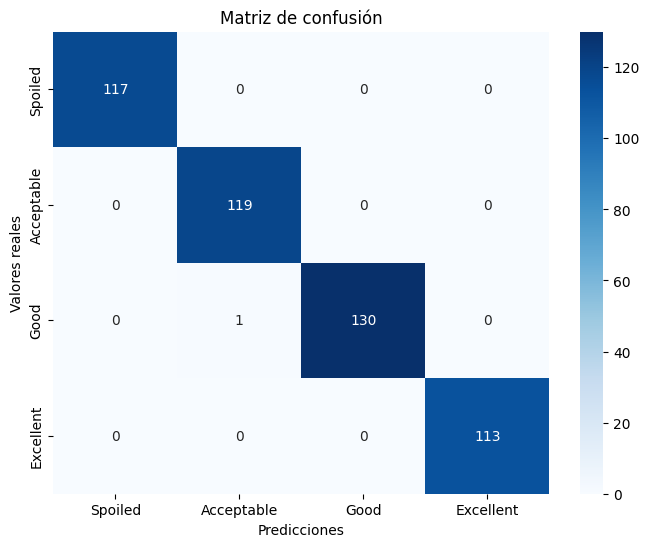

In [203]:
#KNN considerando 1 vecino y distancia manhattan
model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')

resultados_knn_un_vecino=evaluar_modelo(
    model,
    X_train_normalized, y_train, X_test_normalized, y_test)


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9979
  - Precisión (Precision): 0.9979
  - Sensibilidad (Recall): 0.9979
  - F1-Score: 0.9979

Tiempo de entrenamiento: 0.0050 segundos


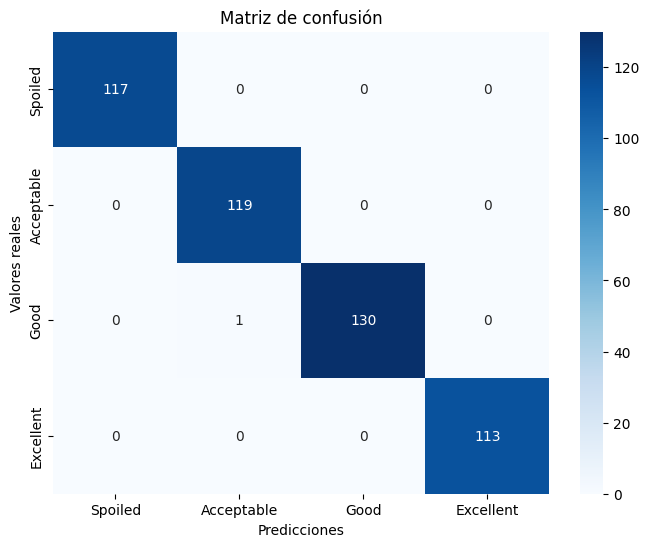

In [204]:
#KNN con 3 vecinos
model = KNeighborsClassifier(n_neighbors=3)

resultados_knn_tres_vecinos=evaluar_modelo(
    model,
    X_train_normalized, y_train, X_test_normalized, y_test)


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.9995
  - Precisión (Precision): 0.9995
  - Sensibilidad (Recall): 0.9995
  - F1-Score: 0.9995

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9958
  - Precisión (Precision): 0.9959
  - Sensibilidad (Recall): 0.9958
  - F1-Score: 0.9958

Tiempo de entrenamiento: 0.0044 segundos


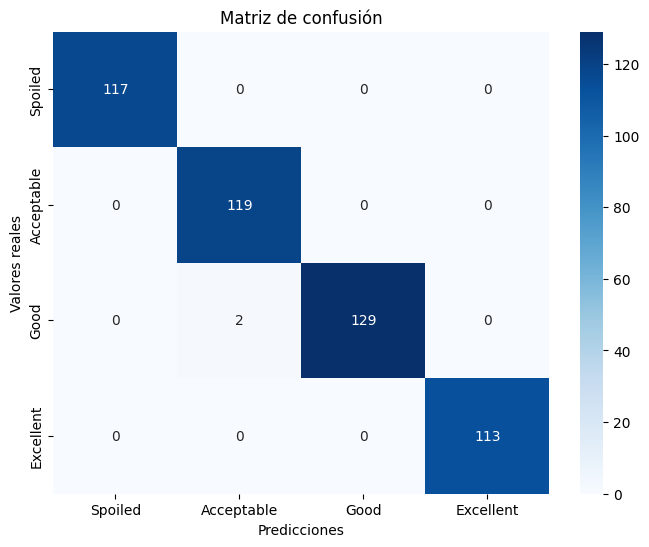

In [205]:
#KNN con 3 vecinos y distancia manhattan
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

resultados_knn_tres_vecinos_manhattan=evaluar_modelo(
    model,
    X_train_normalized, y_train, X_test_normalized, y_test)


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.9990
  - Precisión (Precision): 0.9990
  - Sensibilidad (Recall): 0.9990
  - F1-Score: 0.9990

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9958
  - Precisión (Precision): 0.9959
  - Sensibilidad (Recall): 0.9958
  - F1-Score: 0.9958

Tiempo de entrenamiento: 0.0047 segundos


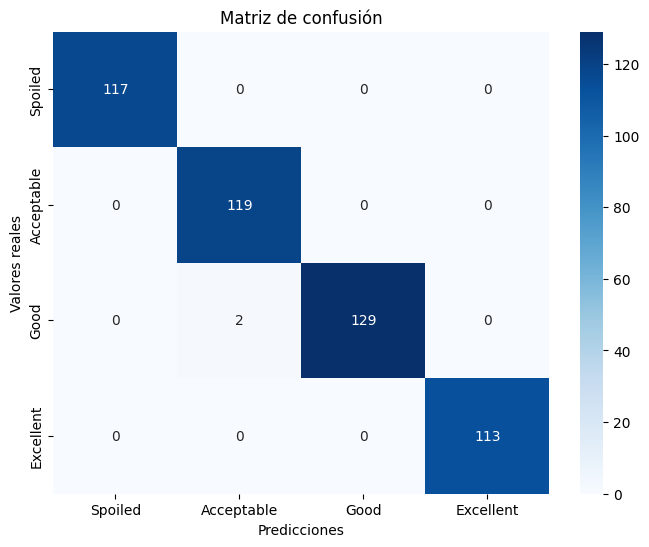

In [206]:
#KNN con 7 vecinos y distancia manhattan
model = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

resultados_knn_siete_vecinos_manhattan=evaluar_modelo(
    model,
    X_train_normalized, y_train, X_test_normalized, y_test)

Vemos como clasifica exactamente igual cambiando el número de vecinos, no hay ni mejora ni empeoramiento. Sin embargo, si vemos un poco de empeoramiento cuando cambiamos de distancia euclídea a distancia Manhattan. Es muy poco ya que solo se equivoca en una instancia más y puede no ser significativa en este problema. Aun así, corroboramos que la distancia euclídea es la más común.

Vemos como el random forest ha clasificado el test perfectamente, por lo que ese modelo es perfecto. Sin embargo, por jugar y probar a cambiar los hiperparámetros, me da curiosidad ver como cambiaría si limitasemos la profundidad del árbol. Esto haría que se reduciese el overtifitting. Al no especificar el parámetro max_depth, está puesto por defecto a None, lo cual quiere decir que el árbol crecerá hasta que las hojas contengan muestras de una misma clase o hasta que se cumplan otras restricciones. Esto hace que salgan árboles muy complejos y por tanto, potencialmente sobreajustados. Por tanto, voy a probar a reducir considerablemente la profundidad para tener árboles sencillos.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.9052
  - Precisión (Precision): 0.9183
  - Sensibilidad (Recall): 0.9052
  - F1-Score: 0.9004

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.8917
  - Precisión (Precision): 0.9051
  - Sensibilidad (Recall): 0.8917
  - F1-Score: 0.8833

Tiempo de entrenamiento: 0.2327 segundos


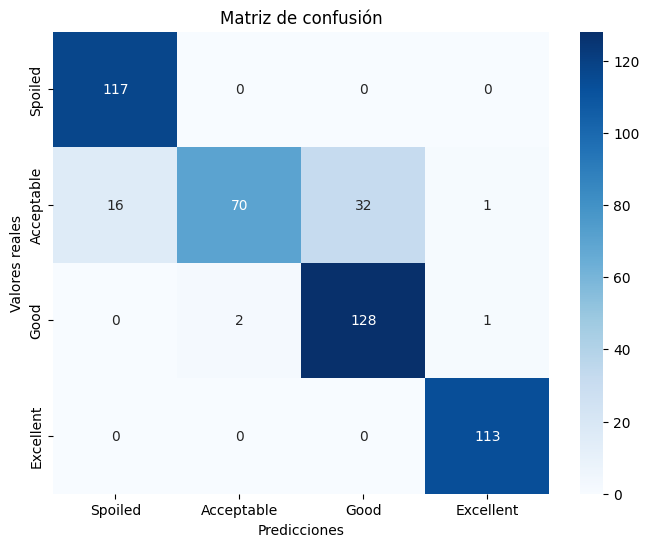

In [207]:
#Modelo Random Forest con profundidad 3 max
resultados_random_forest_profundidad_tres=evaluar_modelo(
    RandomForestClassifier(random_state=19, max_depth=3),
    X_train_normalized, y_train, X_test_normalized, y_test)

Vemos como con profundidad solo tres, es decir, un árbol bastante pequeño, sigue saliendo unos porcentajes bastante buenos. Es verdad que empeora bastante viendo que casi predecía el 100% a la perfección, pero aun así, si buscamos un árbol pequeño y general, este podría ser adecuado.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.9906
  - Precisión (Precision): 0.9910
  - Sensibilidad (Recall): 0.9906
  - F1-Score: 0.9906

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9917
  - Precisión (Precision): 0.9919
  - Sensibilidad (Recall): 0.9917
  - F1-Score: 0.9917

Tiempo de entrenamiento: 0.2903 segundos


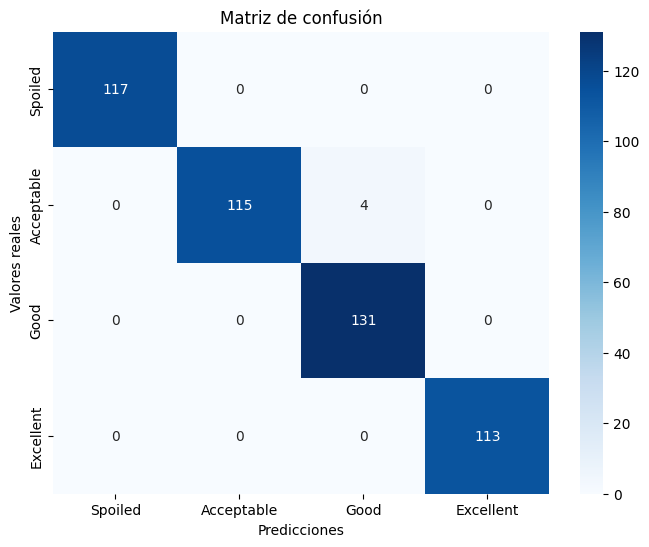

In [208]:
#Modelo Random Forest con profundidad max 5
resultados_random_forest_profundidad_cinco=evaluar_modelo(
    RandomForestClassifier(random_state=19, max_depth=5),
    X_train_normalized, y_train, X_test_normalized, y_test)

Vemos como aumentando ya a 5 de profundidad vuelve a estar rozando la perfección.

De Gradient Boosting pasa al igual que Random Forest, como predice a la perfección es un poco significante cambiar los hiperparámetros ya que no hay nada que mejorar. Por curiosidad, quiero probar a cambiar la tasa de aprendizaje. Cuanto más baja sea, más generalización tendrá y, por tanto, menos sobreajuste. Por defecto, learning_rate=0.1. Vamos a probar a aumentarla y a disminuirla.


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 0.9854
  - Precisión (Precision): 0.9855
  - Sensibilidad (Recall): 0.9854
  - F1-Score: 0.9854

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 0.9854
  - Precisión (Precision): 0.9854
  - Sensibilidad (Recall): 0.9854
  - F1-Score: 0.9854

Tiempo de entrenamiento: 2.1889 segundos


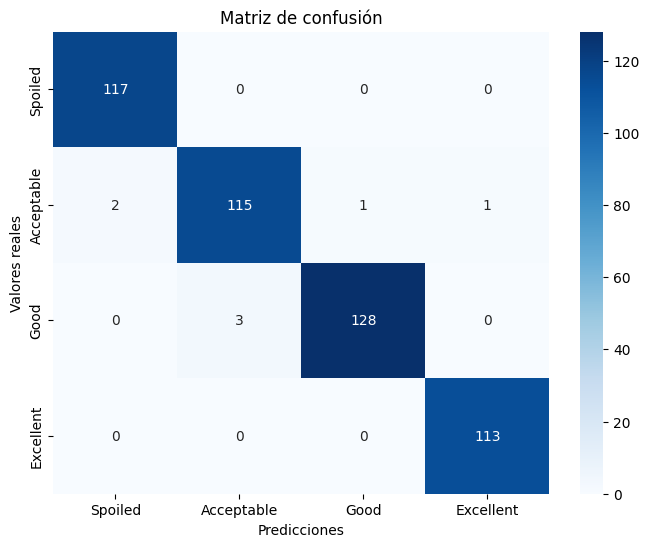

In [209]:
#Modelo Gradient Boosting con learning_rate=0.01
resultados_gradient_boosting_dos=evaluar_modelo(
    GradientBoostingClassifier(random_state=19, learning_rate=0.01),
    X_train_normalized, y_train, X_test_normalized, y_test
)

Vemos como ha habido un empeoramiento con el descenso del learning rate. Puede ser normal ya que estamos evitando el overfitting y generalizando. Aun así, sigue siendo una predicción casi perfecta.

Ahora probamos a subir el learning rate:


Métricas en el conjunto de train:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Métricas en el conjunto de prueba:
  - Tasa de acierto (Accuracy): 1.0000
  - Precisión (Precision): 1.0000
  - Sensibilidad (Recall): 1.0000
  - F1-Score: 1.0000

Tiempo de entrenamiento: 2.2019 segundos


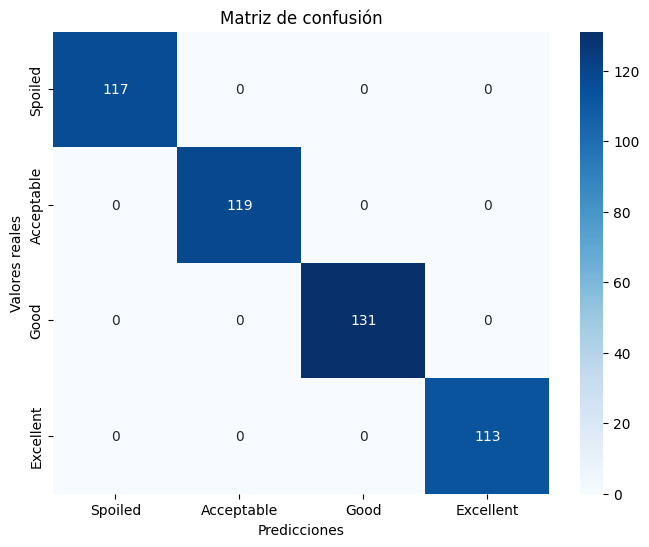

In [210]:
#Modelo Gradient Boosting con learning_rate=0.2
resultados_gradient_boosting_tres=evaluar_modelo(
    GradientBoostingClassifier(random_state=19, learning_rate=0.15),
    X_train_normalized, y_train, X_test_normalized, y_test
)

Con un learning rate mas alto debería de converger más rápido, sin embargo, vemos como el tiempo es prácticamente igual. Esto puede ser debido a que de por sí el modelo converja muy rápido. Aun así, sigue siendo perfecta la predicción.

## Entrenamiento, discusión de resultados y conclusiones

In [211]:
#el entrenamiento ya lo he hecho anteriormente con cada modelo

Para poder discutir bien los resultados de los diferentes algoritmos implementados y llegar a conclusiones, voy a hacer una tabla con las métricas de cada algoritmo.

In [212]:
resultados = {
    'Regresión Logística': resultados_reg_log,
    'Regresión Logística PCA': resultado_reg_log_pca,
    'Regresión Logística Lasso': resultados_reg_log_lasso,
    'KNN': resultados_knn,
    'KNN (1 vecino)': resultados_knn_un_vecino,
    'KNN (3 vecinos)': resultados_knn_tres_vecinos,
    'KNN (3 vecinos, Manhattan)': resultados_knn_tres_vecinos_manhattan,
    'KNN (7 vecinos, Manhattan)': resultados_knn_siete_vecinos_manhattan,
    'Random Forest': resultados_random_forest,
    'Random Forest profundidad 3':resultados_random_forest_profundidad_tres,
    'Random Forest profundidad 5':resultados_random_forest_profundidad_cinco,
    'Gradient Boosting': resultados_gradient_boosting,
    'Gradient Boosting con learning rate 0.01': resultados_gradient_boosting_dos,
    'Gradient Boosting con learning rate 0.15': resultados_gradient_boosting_tres
}

In [213]:
#hacemos una lista de diccionarios
datos_tabla = []
for nombre, res in resultados.items():
    fila = {
        'Modelo': nombre,
        'Train Accuracy': res['train_metrics']['accuracy'],
        'Train F1': res['train_metrics']['f1'],
        'Test Accuracy': res['test_metrics']['accuracy'],
        'Test F1': res['test_metrics']['f1'],
        'Tiempo (s)': res['training_time']
    }
    datos_tabla.append(fila)

In [214]:
#convertimos a DataFrame y ordenar por acuraccy del test
df_comparativo_acuraccy = pd.DataFrame(datos_tabla).sort_values('Test Accuracy', ascending=False)

#mostramos tabla de resultados
print(df_comparativo_acuraccy.to_markdown(index=False))

| Modelo                                   |   Train Accuracy |   Train F1 |   Test Accuracy |   Test F1 |   Tiempo (s) |
|:-----------------------------------------|-----------------:|-----------:|----------------:|----------:|-------------:|
| Gradient Boosting                        |         1        |   1        |        1        |  1        |   2.74487    |
| Random Forest                            |         1        |   1        |        1        |  1        |   0.492981   |
| Gradient Boosting con learning rate 0.15 |         1        |   1        |        1        |  1        |   2.20186    |
| KNN (3 vecinos)                          |         1        |   1        |        0.997917 |  0.997917 |   0.00503564 |
| KNN (1 vecino)                           |         1        |   1        |        0.997917 |  0.997917 |   0.00373435 |
| KNN                                      |         1        |   1        |        0.997917 |  0.997917 |   0.00481153 |
| KNN (7 vecinos, Manhat

Vemos como los tres primeros que son gradient boosting y random forest lo predicen a la perfección tanto en train como en test. Podríamos pensar cuando vemos las métricas de test que estamos ante un sobreajuste extremo, pero realmente en el test se comporta igual. Esto en la realidad es bastante extraño ya que es muy difícil hacer un modelo que prediga el 100% de los nuevos datos. Por tanto, creo que estamos ante un dataset muy sencillo de clasificar y que los datos están muy filtrados y limpios.

Los siguientes son los KNN y sus variaciones de vecinos y de cambio de distancia. Vemos que aunque sea un algoritmo muy simple y realmente solo usa los propios datos para predecir, funciona muy bien. En comparación con los hiperparámetros cambiados, vemos como cuando cambiamos la distancia de la euclidea a la manhattan no funciona tan bien. Además, el que mejor funciona es considerando la distancia euclídea con 3 vecinos solo.

Entre los Random Forests, vemos como al reducir y limitar la profundidad del árbol, no salen tan buenos resultados. Estamos haciendo árboles más pequeños y genéricos a costa de reducir un poco el acuraccy.

Por último tenemos la regresión logística que es la más baja de todas. Se nota un gran salto de acuraccy ya que es un modelo extramadamente simple. Entre ellas, la que mejor funciona es con la regularización lasso y la que menos funciona con la eliminación de variables. Esto se puede deber a que hay pocas variables y si las compactamos estamos eliminando información.

Dependiendo del problema y de la importancia que tenga el acuraccy, otras métricas, el tiempo... podríamos elegir uno u otro mirando solamente esta tabla.

In [215]:
#convertimos a DataFrame y ordenar por tiempo ascendente
df_comparativo_tiempo = pd.DataFrame(datos_tabla).sort_values('Tiempo (s)', ascending=True)

#mostramos tabla de resultados
print(df_comparativo_tiempo.to_markdown(index=False))

| Modelo                                   |   Train Accuracy |   Train F1 |   Test Accuracy |   Test F1 |   Tiempo (s) |
|:-----------------------------------------|-----------------:|-----------:|----------------:|----------:|-------------:|
| KNN (1 vecino)                           |         1        |   1        |        0.997917 |  0.997917 |   0.00373435 |
| KNN (3 vecinos, Manhattan)               |         0.999479 |   0.999479 |        0.995833 |  0.995835 |   0.00437403 |
| KNN (7 vecinos, Manhattan)               |         0.998958 |   0.998958 |        0.995833 |  0.995835 |   0.0047245  |
| KNN                                      |         1        |   1        |        0.997917 |  0.997917 |   0.00481153 |
| KNN (3 vecinos)                          |         1        |   1        |        0.997917 |  0.997917 |   0.00503564 |
| Regresión Logística PCA                  |         0.75625  |   0.75184  |        0.766667 |  0.763331 |   0.0202024  |
| Regresión Logística   

Si nos centramos en el tiempo empleado en entrenar, tenemos un claro ganador. Los modelos más rápidos son los KNN. Esto corrobora la teoría, ya que KNN solo almacena los datos de entrenamiento y no necesita un entrenamiento como tal. Al estar ante un dataset no muy grande, este modelo va muy rápido y acertado.

Como segundo puesto está la regresión logística. Es esperable ya que es un modelo lineal fácil de entrenar.

Con diferencia, los que más tardan son los Gradient Boosting y sus variantes. Es normal ya que tienen que realizar múltiples árboles secuenciales o profundos y aumenta el tiempo de cómputo.

# **Ejercicio 2: Problema de regresión (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de regresión, que tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para desarrollar **lenguas electrónicas** capaces de determinar el pH de una solución acuosa. El conjunto de datos se obteniene a partir de la investigación realizada en los siguientes artículos:

- S. Capel-Cuevas, M.P. Cuéllar, I. de Orbe-Payá, M.C. Pegalajar, L.F. Capitán-Vallvey, Full-range optical pH sensor array based on neural networks, Microchemical Journal, Volume 97, Issue 2, 2011, Pages 225-233, ISSN 0026-265X, <a href="https://doi.org/10.1016/j.microc.2010.09.008">https://doi.org/10.1016/j.microc.2010.09.008</a>.

- Capel-Cuevas S, López-Ruiz N, Martinez-Olmos A, Cuéllar MP, Pegalajar Mdel C, Palma AJ, de Orbe-Payá I, Capitán-Vallvey LF. A compact optical instrument with artificial neural network for pH determination. Sensors (Basel). 2012;12(5):6746-63. doi: 10.3390/s120506746. Epub 2012 May 22. PMID: 22778668; PMCID: PMC3386767 (URL: <a href="https://pubmed.ncbi.nlm.nih.gov/22778668/">https://pubmed.ncbi.nlm.nih.gov/22778668/</a>.




## Contexto y motivación del problema

El pH es una medida que indica la acidez o alcalinidad de una solución. Se mide en una escala que va de 0 a 14, donde un pH de 7 es considerado neutro, valores por debajo de 7 indican acidez y valores por encima de 7 indican alcalinidad.

Las utilidades del pH son bastante amplias. Algunas son:

1. **En la agricultura**: Conocer el pH del suelo es crucial para determinar qué cultivos pueden crecer mejor en esa tierra y para ajustar la fertilización.

2. **En química**: En laboratorios, el pH es fundamental para llevar a cabo reacciones químicas adecuadas, ya que muchas reacciones dependen de un pH específico.

3. **En medicina**: En el ámbito médico, el pH de la sangre y otros fluidos corporales puede ser un indicador importante de la salud de una persona.

4. **En el tratamiento de aguas**: El pH del agua es esencial para asegurar que sea segura para el consumo y para el tratamiento de aguas residuales.

5. **En cosmética**: En productos de cuidado personal, el pH puede afectar la eficacia y la seguridad de los productos en la piel.


Habitualmente, el análisis de pH de una disolución es un proceso que conlleva la toma de muestras de la solución en cuestión, su transporte a un laboratorio, el análisis con métodos específicos de tratamiento (pH-metros) y el informe final de análisis de pH.


Como alternativa, **en esta práctica pretendemos elaborar un modelo de aprendizaje automático** capaz de ser integrado en **lenguas electrónicas** sensibles al pH de una disolución. Una lengua electrónica es un dispositivo o sistema que simula la capacidad del sentido del gusto y que se utiliza para analizar y evaluar diferentes líquidos, como alimentos y bebidas, mediante la detección de compuestos químicos.

<img src="https://pub.mdpi-res.com/biosensors/biosensors-08-00003/article_deploy/html/images/biosensors-08-00003-ag-550.jpg?1569758982" />

Estas *lenguas* funcionan a través de sensores que responden a diferentes sustancias químicas, generando un perfil de sabor que puede ser analizado y comparado. Son muy útiles en la industria alimentaria para controlar la calidad, desarrollar nuevos productos y realizar pruebas de sabor de manera objetiva. Además, las lenguas electrónicas pueden ser utilizadas en otras áreas, como el monitoreo ambiental y la detección de contaminantes. En resumen, son herramientas valiosas para obtener información sobre el sabor y la composición de líquidos de manera precisa y eficiente.

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1038%2Fs41378-024-00690-9/MediaObjects/41378_2024_690_Figa_HTML.png" />


## El conjunto de datos

El modelo de regresión a desarrollar en esta práctica **tendrá como entrada los valores de un array de sensores (*papilas gustativas*) localizado en una lengua electrónica sensible al pH, y deberá proporcionar como resultado el valor de pH de la solución acuosa que entre en contacto con dicha lengua electrónica**.

En total dispondremos de **12 sensores distintos** (*papilas gustativas* de distinto tipo), capaces de cambiar de color ante la presencia de pH de distinta magnitud. Estos sensores se imprimen químicamente sobre un soporte o tarjeta, la cual se entra en contacto con la disolución para capturar sus propiedades.  El diseño de la disposición de estos sensores es la mostrada en la siguiente figura:


<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr1.jpg" />
</center>

La reacción de cada sensor frente al pH produce un cambio de color en el mismo. Cada sensor se corresponde con un compuesto químico capaz de cambiar de color ante la detección de pH en un rango determinado. En concreto, el cambio se produce en la tonalidad o componente *Hue (H)* del espacio de color HSV (<a href="https://es.wikipedia.org/wiki/Modelo_de_color_HSV">https://es.wikipedia.org/wiki/Modelo_de_color_HSV</a>).


Cuando el array de sensores entra en contacto con una disolución, el valor de tonalidad color H del espacio HSV es capturado por el dispositivo electrónico (lengua electrónica) que se muestra en la siguiente figura, y es trasladado a un modelo de aprendizaje automático capaz de determinar el pH de la solución.

<center>
<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0925400511001730-gr3.jpg" />
</center>


El modelo de decisión para determinar el pH de la disolución a partir de los datos de los sensores necesita ser entrenado previamente para tener un desempeño correcto. El conjunto de datos a utilizar tiene el siguiente formato:

- **Datos de entrada (X)**: Valor de tonalidad (componente H del espacio de color HSV) de cada uno de los sensores.
- **Datos de salida (Y)**: Valor de pH de la disolución.


Se ha generado un conjunto de datos para la práctica accesible desde el enlace mostrado en la siguiente celda de código, el cual deberá ser usado por el estudiante para elaborar la práctica.

In [216]:
#Dataset disponible:
path_to_data_regression= 'https://www.dropbox.com/scl/fi/3x7kovawtekmr20d8hd22/ElectronicTongue.csv?rlkey=7ewm92dgd09n32t576ah5kz36&st=hnabds8t&dl=1'

#Leemos el archivo csv donde está el dataset
data= pd.read_csv(path_to_data_regression)

#Enseñamos el principio del dataset (las 5 primeras filas)
data.head(5)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
0,0.087840,0.082959,0.043743,0.240354,0.962288,0.930497,0.573987,0.472071,0.585784,0.433157,0.951765,0.232850,9.750569
1,0.991412,0.138204,0.146882,0.253658,0.179650,0.223246,0.521936,0.239807,0.311388,0.173503,0.170280,0.139872,4.005951
2,0.981929,0.148916,0.149017,0.256501,0.029655,0.211787,0.527765,0.218596,0.306480,0.185925,0.196952,0.152865,3.175920
3,0.072656,0.114040,0.149145,0.228738,0.945559,0.240352,0.521567,0.464956,0.591732,0.235044,0.961599,0.169974,7.718407
4,0.077545,0.896920,0.038023,0.242319,0.955601,0.886227,0.564030,0.487052,0.586597,0.501194,0.952609,0.262741,10.072566



## Tareas a realizar:

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de, al menos, 3 modelos de aprendizaje automático a emplear en la resolución del problema, de los cuales 1 por lo menos debe ser un *ensemble*.
5. Selección y estimación de valores para hiperparámetros (incluyendo el tipo de regularización a usar, en su caso).
6. Entrenamiento y estimación del error fuera de la muestra usada para optimizar el modelo. Discusión de resultados y extracción de conclusiones.


## Análisis descriptivo y exploratorio de los datos


**Aclaración**: voy a seguir la estructura del Notebook para las explicaciones sobre todo, pero no para la totalidad del código ya que no creo conveniente el orden de implementación. Por ejemplo, creo que es una buena técnica hacer la partición antes de hacer el preprocesamiento (por ejemplo la normalización) y el análisis exploratorio de los datos. Sin embargo, para el análisis exploratorio de los datos puede ser un poco lioso si hacemos la partición en k-fold ya que tendríamos cada vez un train y así podríamos sacar e interpretar gráficas representativas de todo el conjunto en lugar de una serie de gráficas para cada fold.

Este ejercicio se trata de regresión, es decir, no tenemos que clasificar en clases, si no que queremos predecir un número que se mueve de manera continua en el rango de la variable objetivo.

Empezamos viendo las características que tenemos a disposición.

In [217]:
#Columnas del dataset
data.columns

Index(['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S12', 'pH'],
      dtype='object')

Efectivamente tenemos 12 sensores y la variable objetivo pH. Todas las variables son de tipo numérico (float64):

In [218]:
#Funcion que nos da información sobre el dataset data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      197 non-null    float64
 1   S2      197 non-null    float64
 2   S3      197 non-null    float64
 3   S4      197 non-null    float64
 4   S5      197 non-null    float64
 5   S6      197 non-null    float64
 6   S7      197 non-null    float64
 7   S8      197 non-null    float64
 8   S9      197 non-null    float64
 9   S10     197 non-null    float64
 10  S11     197 non-null    float64
 11  S12     197 non-null    float64
 12  pH      197 non-null    float64
dtypes: float64(13)
memory usage: 20.1 KB


Tenemos 197 filas en todos, por lo que podemos ver que no hay missing values.

Como todos los sensores son datos numéricos, vamos a generar estadísticas descriptivas para ver un poco por encima como se distribuyen estos datos:

In [219]:
#Estadísticas descriptivas
#funcion describe() de pandas que nos describe numericamente los datos del dataframe
data.describe()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,pH
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.336011,0.311151,0.108007,0.244798,0.759533,0.415852,0.591829,0.403035,0.474449,0.329606,0.592519,0.257617,7.057899
std,0.416495,0.326254,0.052651,0.007554,0.367115,0.312690,0.147218,0.128811,0.132929,0.173125,0.384723,0.185455,3.730592
min,0.002813,0.010524,0.020254,0.221074,0.019397,0.050465,0.489487,0.172843,0.229236,0.069326,0.032001,0.019680,0.037633
25%,0.073306,0.096973,0.038023,0.239667,0.938072,0.199607,0.510685,0.305738,0.307626,0.202479,0.180242,0.140835,4.266753
50%,0.077789,0.132687,0.143181,0.243952,0.954763,0.233274,0.526194,0.462901,0.571261,0.245947,0.888424,0.171341,7.301463
75%,0.983059,0.780666,0.148979,0.250068,0.962389,0.773299,0.563804,0.482598,0.583058,0.495607,0.955536,0.268205,10.048606
max,0.996590,0.939229,0.156874,0.260703,0.993289,0.977786,0.926026,0.554047,0.610545,0.914962,0.981891,0.798830,13.935019


Volvemos a verificar que estas variables no tienen datos faltantes por la fila de "count". Obtenemos información acerca de la media, la desviación típica, el mínimo y máximo que toman y los percentiles 25, 50 y 75.

Destaca la columna S5 por tener un valor bastante más alto en general a las otras columnas. En contraposición, S3 parece ser la más baja de todas.

En cuanto a la desviación típica, la cual mide la dispersión alrededor de la media, el sensor S4 es muy bajo, por lo que podemos llegar a pensar que nos va a aportar poca información ya que todos sus valores son muy homogéneos. El sensor con la variabilidad más grande es S1, por lo que es más sensible a cambios.

En cuanto a la variable objetivo, sabemos de cultura general que el pH tiene un rango del 0 al 14. Vemos como el mínimo y máximo que adquiere la variable es ese aproximadamente, asi que podemos pensar que puede que haya ejemplos bien distribuidos, pero tendremos que indagar más. La media está en 7, que es justo la media numérica. Junto con estas medidas y con los percentiles, nos damos cuenta que posiblemente estén bastante bien distribuidos.

Completamos este análisis más matemático de los sensores viendo la distribución de los valores de cada sensor con histogramas.



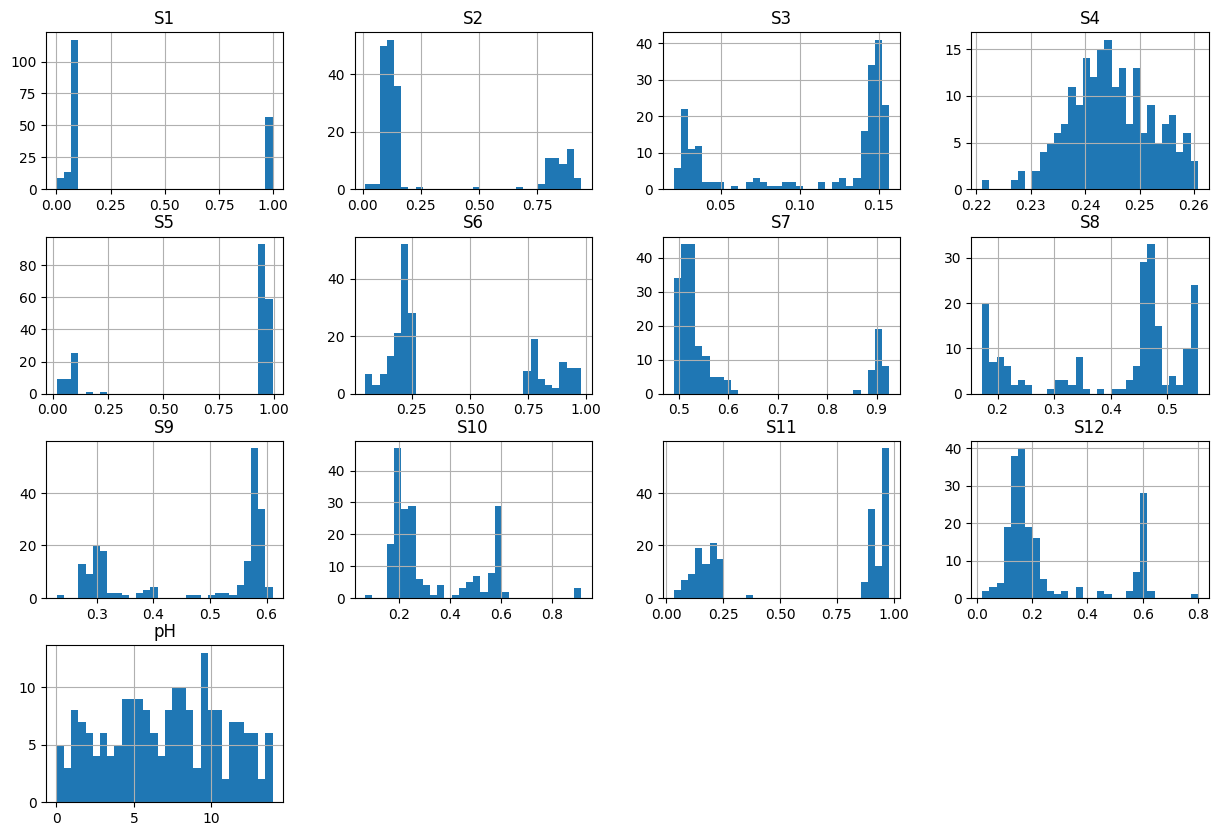

In [220]:
#Creamos un histograma
#hist(): funcion para calcular y dibujar un histograma de las variables numéricas
# agrupa los datos en x y contar el número de valores en cada agrupación, luego dibuja la distribución ya sea como un BarContainer o un Polígono.
#argumentos:
#bins=30: divide el rango de datos en 30 intervalos para el histograma.
#figsize=(15, 10): establece el tamaño de la figura a 15 pulgadas de ancho y 10 de alto.
data.hist(bins=30, figsize=(15, 10))

#plt.show(): funcion que muestra el histograma generado anteriormente
#sin argumentos
plt.show()

Corroboramos con el histograma del pH es nua distribución bastante dispersa con valores uniformemente distribuidos en el intervalo teórico del pH: $[0,14]$.No parece haber una fuerte asimetría ni una clara concentración de valores en un rango específico.

Centrandonos en los sensores, vemos como hay algunos que están altamente sesgados.

S1 y S5 casi todos sus valores son cerca de 0 o 1, lo que podríamos pensar que son variables binarias o con valores extremos dominantes.

S4 tiene una distribución más cercana a una gaussiana (hace el mismo dibujo).

Antes de continuar, vamos a quitar del dataset la columna a predecir, la vamos a separar. Por tanto, vamos a separar las características (X) de la variable objetivo (Y).

In [221]:
#Separamos los sensores (X) de la variable a predecir (Y)
#drop(): funcion que crea un DataFrame X eliminando la columna 'pH' del dataset original. Es decir, elimina las columnas que se le pasen como parámetro
#data(): función que crea una serie Y con solo la columna 'pH' . Así separamos los datos de la variable objetivo
X = data.drop(columns=['pH'])
Y = data['pH']
print(X)

           S1        S2        S3        S4        S5        S6        S7  \
0    0.087840  0.082959  0.043743  0.240354  0.962288  0.930497  0.573987   
1    0.991412  0.138204  0.146882  0.253658  0.179650  0.223246  0.521936   
2    0.981929  0.148916  0.149017  0.256501  0.029655  0.211787  0.527765   
3    0.072656  0.114040  0.149145  0.228738  0.945559  0.240352  0.521567   
4    0.077545  0.896920  0.038023  0.242319  0.955601  0.886227  0.564030   
..        ...       ...       ...       ...       ...       ...       ...   
192  0.048954  0.127506  0.151243  0.243166  0.970230  0.248081  0.490562   
193  0.075856  0.096109  0.074989  0.228797  0.948961  0.954146  0.531963   
194  0.984933  0.047998  0.148072  0.239157  0.115247  0.140952  0.521391   
195  0.073504  0.074298  0.087286  0.254718  0.964322  0.050465  0.525504   
196  0.983743  0.026914  0.146666  0.240818  0.108857  0.142187  0.518820   

           S8        S9       S10       S11       S12  
0    0.472071  0.58

No hay variables categóricas, por lo que no hacemos un estudio de codificado de datos.

## Preprocesado de datos


*   Selección y extracción de características
*   Reducción de dimensionalidad
*   Outliers
*   Missing values
*   Escalado de variables
*   Codificación y transformación de datos
*   Desbalanceo de datos

### Selección, extracción de características y reducción de dimensionalidad

Para ver si existe correlación entre los sensores (las variables numéricas), vamos a estudiar la matriz de correlación. Con esta matriz solo podemos ver las correlacion lineales y detectar multicolinealidad:

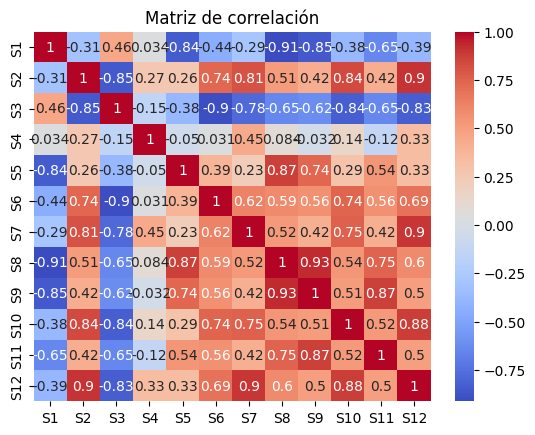

In [222]:
#Matriz de correlación
#corr(): calcula la matriz de correlación entre todas las variables numéricas del dataframe X
#heatmap(): genera un mapa de calor de la matriz de correlación:
  #annot=True muestra los valores numéricos en cada celda
  #cmap='coolwarm': para usar escala de azul para correlacion negativa y escala de rojo para correlacion positiva
matriz_correlacion = X.corr() #calculamos la matriz de correlacion
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm') #mapa de calor (cuanto mas inteso el color más cercano a 1 en valor absoluto)
plt.title('Matriz de correlación')#le ponemos titulo
plt.show()#lo enseñamos

Dentro de esta matriz de correlación tenemos el coeficiente de correlación para cada pareja de la matriz, es decir, vamos a intentar asociar parejas que aporte prácticamente la misma información porque estén correladas.

Los coeficientes de correlación van desde el -1 al 1 donde el 1 representa la máxima correlación directa, el -1 la máxima correlación indirecta y el 0 significa que no están correladas. Esto sigue el código de colores, de hecho, la leyenda de la derecha lo explica. Cuanto el color sea más intenso más correladas están, rojo para correlación directa y azul para correlación inversa.


Vemos como hay bastante correlación. Podemos ver como hay varios más de 0.85 en valor absoluto, lo que nos indica que puede que haya variables que estén muy correladas y que en cierta parte nos estén aportando la misma información. Por tanto, he pensado que una buena estrategia en esta situación puede ser hacer PCA ya que hay muchas muy correladas. Con esta técnica podemos reducir la cantidad de dimensiones en grandes conjuntos de datos a componentes principales que conservan la mayor parte de la información original. Seleccionamos las variables potencialmente correlacionadas y hace un conjunto más pequeño de variables, llamadas componentes principales. Estas componentes no son variables del conjunto en sí, si no que son nuevas variables que son combinaciones lineales de las características originales.

Sin embargo, esto sí es más correcto hacerlo una vez que hayamos hecho la partición, por lo que lo vamos a dejar para después.

### Outliers
Un valor atípico (outlier) son datos que se desvían significativamente del resto de los datos. Puede ser mucho más alto o mucho más bajo que los demás puntos de datos. Esto puede hacer que se desvie el ajuste del modelo.

Pueden ser errores de medición o de ejecución.

Hay más métodos para detectar outliers, como el Z-score, pero nosotros vamos a usar uno de los métodos más comunes: método del rango intercuartílico (IQR): es una medida de dispersión estadística que se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1):
$$ IQR=Q3−Q1 $$

Donde el primer cuartil (Q1) representa el valor que deja el 25% de los datos por debajo de él y el tercer cuartil (Q3) representa el valor que deja el 75% de los datos por debajo de él. Por tanto, el IQR representa el rango en el que se encuentra el 50% central de los datos.

Ahora, tenemos que definir un umbral para considerar a una instancia outlier. Se define una cota inferior y una cota superior de la siguiente forma:

 $$Lim\_inf=Q1−1.5×IQR$$

 $$Lim\_sup=Q3+1.5×IQR$$

 Cualquiera instancia fuera de esos límites se considerará un outlier.


Vamos a estudiarlos y analizarlos después de hacer la partición.

In [223]:
#misma funcion que el anterior ejercicio
#Función para detectar outliers como hemos explicadojusto arriba
def detectar_outliers_IQR(column):
    Q1 = column.quantile(0.25) #primer cuartil del 25
    Q3 = column.quantile(0.75) #cuartil del 75
    IQR = Q3 - Q1 #nos quedamos con la parte central: rango intercuartilico
    cota_inferior = Q1 - 1.5 * IQR #lim_inf
    cota_superior = Q3 + 1.5 * IQR #lim_sup
    return (column < cota_inferior) | (column > cota_superior)  #devuelve booleano


### Missing values
Ya lo hemos visto anteriormente que no había valores perdidos pero vamos a ratificarlo una vez más.

In [224]:
#Missing values (son los que son null)
print("Valores faltantes por columna:")
print(data.isnull().sum()) #vemos cuale están vacías y las sumamos para ver el total

Valores faltantes por columna:
S1     0
S2     0
S3     0
S4     0
S5     0
S6     0
S7     0
S8     0
S9     0
S10    0
S11    0
S12    0
pH     0
dtype: int64


Efectivamente no hay valores perdidos. Si los hubiese tendríamos que imputarlos, es decir, calcular un valor para completarlo. Se suele utilizar la media en variables numéricas y la moda en variables categóricas. Sin embargo, lo más recomendable hubiese sido imputarlo con un modelo, como por ejemplo un KNN.

Si hubiese habido un valor faltante en la etiqueta, tendríamos que haber eliminado esa instancia porque no sabríamos como clasificarla.

### Escalado de variables

El escalado de variables es importante para algoritmos que utilizan distancias, como el KNN. Como hemos podido comprobar antes, no todas las variables numéricas están en la misma escala ni mismo rango, por lo que las variables que sean más grande tendrán más peso. Pero no queremos esto, queremos que todas tengan la misma importancia, por lo que tendremos que ponerlas en el mismo rango.

Las dos opciones más comunes para el escalado de variables es: StandardScaler y MinMaxScaler. En este caso voy a utilizar MinMaxScaler.


StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Sigue la fórmula:

$$
    z = \frac{x - \mu}{\sigma}
$$

donde

*   $x$: valor original.
*   $\mu$: media de la columna.
*   $\sigma$: desviación estándar de la columna.

Así conseguiríamos que los datos estuviesen centrados en la media alrededor de 0 y que tengan desviación típica 1. Además, podrían haber números negativos o mayores que 1, por lo que no están limitados a un rango. Esto hacer que sea menos sensibles a outliers.

Este tipo se suele utilizar cuando creemos que lso datos siguen una distribución normal o son datos simétricos.








En cuanto a MinMaxScaler: transforma los datos paar que estén en un rango, suele ser entre 0 y 1.

La fórmula que utiliza es:
$$
x_{\text{scaled}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
$$

Se usa cuando hay una distribución asimétrica o cuando no siguen distribución normal.

Esto sí es altamente recomendado hacerlo una vez hecha la partición ya que estamos directamente usando datos de test. Esto se debe a que si normalizas sabiendo una media, realmente esa media no corresponde exclusivamente al train, si no que estás sabiendo la media también de los datos de test, lo que no es correcto.

### Codificación y transformación de datos
Como todos los datos son numéricos, no tenemos que codificar como en el ejercicio anterior. La única transformación que por ahora le haremos a los datos será la normalización, pero una vez hayamos hecho la partición.

### Desbalanceo de datos

Al ser un problema de regresión y no de clasificación, el desbalanceo no se puede estudiar de la misma manera. Es decir, no podemos mirar cuantos ejemplos hay de cada clase. Sin embargo, podemos estudiar la distribución de la variable objetivo para detectar problemas que puedan afectar el modelo.

Anteriormente hemos visto el histograma del pH y hemos visto que no está sesgada hacia un lado y que se distribuye bastante uniforme.

## Técnicas de validación experimental y métricas de evaluación del rendimiento

Las principales técnicas de validación experimental que voy a valorar para aplicar son:


*   **Hold-out:** dividimos en dos partes (train y test).Usamos el train para entrenar el modelo y que aprenda y el test para evaluar el rendimiento total del modelo. Vamos a probar a hacer una partición de los datos del 80% train y 20% test. Sus ventajas es que es simple y bajo coste computacional, pero no utiliza todos los datos para aprender, por lo que dependerá de su buen funcionamiento el tamaño del dataset.
*   **Cross-validation con kfold:** se dividen los datos en k particiones del mismo tamaño. El modelo se entrena k veces, usando k-1 particiones para entrenar y 1 partición para validar. Al final, el rendimiento final es el promedio de las métricas obtenidas en cada iteración. Con respecto al anterior, usa todos los datos para entrenar y validar y es más robusto. Sin embargo, computacionalmente es más costoso. En este caso, vamos a probar con un 5-fold.
*   **Cross-validation estratificado:** en este caso, al ser regresión, no se puede usar StratifiedKFold directamente porque la variable a predecir es continua y no se divide por clases. Si quisieramos aplicarlo, tendríamos que agrupar los valores de Y en bins (como por ejemplo en percentiles) y luego se usaría StratifiedKFold. Por ahora, no lo veo muy necesario, por lo que probaremos sin utilizarlo.
*   **Cross-validation con leave-one-out:** es un caso extremo de k-fold donde en cada iteración se usa una muestra como conjunto de validación y las n-1 muestras restantes como conjunto de entrenamiento. Se repite este proceso n veces, una para cada muestra. Se suele utilizar para conjuntos extremadamente pequeños de datos porque es muy costoso computacionalmente, por lo que en este caso no lo vamos a utilizar.
*   **Bootstrapping:** se generan múltiples conjuntos de entrenamiento muestreando con reemplazo del conjunto de datos original y se evalúa el modelo en las muestras no seleccionadas (out-of-bag). Al final, el rendimiento final es el promedio de las métricas obtenidas en cada iteración. También se utiliza para dataset pequeños, por lo que no nos planteamos utilizarlo.



## Hold-out

In [225]:
#Dividimos los datos en entrenamiento (80%) y prueba (20%)
#train_test_split(): divide los datos en conjuntos con la el porcentaje que le das por parametro
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=19)

#Miramos los tamaños de los conjuntos
print(f"Entrenamiento: {X_train.shape[0]} instancias")
print(f"Prueba: {X_test.shape[0]} instancias")

Entrenamiento: 157 instancias
Prueba: 40 instancias


Vemos como es un dataset bastante más pequeño que el anterior en cuanto a número de ejemplos.


Outliers en train
S1: 0 outliers (0.00%)
S2: 0 outliers (0.00%)
S3: 0 outliers (0.00%)
S4: 1 outliers (0.64%)
S5: 35 outliers (22.29%)
S6: 0 outliers (0.00%)
S7: 31 outliers (19.75%)
S8: 0 outliers (0.00%)
S9: 0 outliers (0.00%)
S10: 0 outliers (0.00%)
S11: 0 outliers (0.00%)
S12: 1 outliers (0.64%)


<Figure size 1200x600 with 0 Axes>

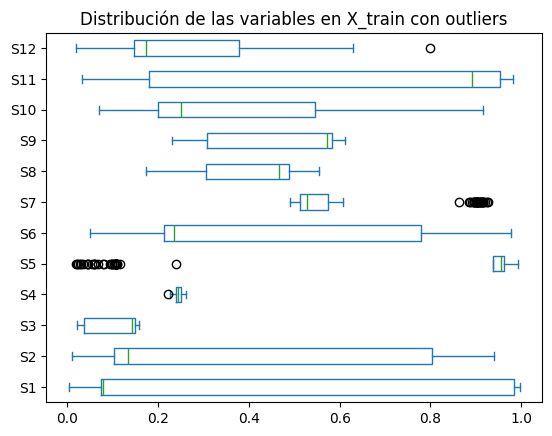

In [226]:
# usando la funcion declarada para detectar outliers, detectamos SOLO en train
outliers_train = {}
for col in X_train.columns: #miramos en cada columna si hay outliers
    outliers_train[col] = detectar_outliers_IQR(X_train[col])

# resultados por columna, calculamos porcentajes de los numeros obtenidos
print("\nOutliers en train")
for col, mask in outliers_train.items():
    n_outliers = mask.sum()
    porcentaje = (n_outliers / len(X_train)) * 100
    print(f"{col}: {n_outliers} outliers ({porcentaje:.2f}%)")

# boxplot de todas las variables dibujando tambien los outliers
plt.figure(figsize=(12, 6))
X_train.plot(kind='box', vert=False)
plt.title('Distribución de las variables en X_train con outliers')
plt.show()

Vemos como solo hay dos variables con outliers, pero estas dos variables suben hasta alrededor del 20% de outliers de los ejemplos, lo que indica que tienen valores extremos fuera del rango normal.

En el caso de S5 podemos corroborar con el histograma que parece una varible binaria ya que solo se encuentran valores cerca del 0 y cerca del 0, de ahí que sse detecten tantos outliers. Al igual pasa un poco con la otra variable que presenta muchos outliers, S7. Parece que predominan solo dos valores, cerca del 0.5 y cerca del 1, por lo que también podría ser otra variable binaria.

Por tanto, no veo correcto eliminar outliers porque si no estaríamos perdiendo información de dos variables que simplemente parecen ser binarias.

Como hemos visto que predominan las variables asimétricas ya que solo una se veía de forma de gaussiana. Por tanto, vamos a hacer el mismo escalado que el ejercicio anterior, lo veo más conveniente.

In [227]:
# Vamos a aplicar ahora la formalización MinMax (aprendiendo solo del train)
# MinMaxScaler(): escala en [0,1]
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)  #aprende los parametros min/max de train y los transforma
X_test_normalized = scaler.transform(X_test)       # aplicamos la misma transformación a test

#Comprobamos:
print("Normalización (Train): Min =", X_train_normalized.min(), "Max =", X_train_normalized.max())

Normalización (Train): Min = 0.0 Max = 1.0


Voy a hacer una explicación más detallada de por qué es importante normalizar después de hacer la normalización como estamos aplicando.
La razón es para evitar *data leakage* o bien conocido como fuga de datos, que es lo que ocurriría si usaramos información del conjunto prueba para preprocesar los datos. Por tanto, primero hemos dividido en train y test. Después, hemos aprendido los parámetros de normalización min y max solo del train. Por último, hemos aplicado esos mismos parámetros a test.

Esto se hace ya que si normalizáramos antes de dividir, test estaría influenciados por estadísticos de todos los datos. Como consecuencia, el rendimiento sería optimista e irreal, porque el modelo habría "visto" indirectamente datos de test durante el preprocesamiento.

Viendo los resultados de la normalización, efectivamente el train se queda en el intervalo $[0,1]$, redondeando.

Por último, no es correcto analizar el conjunto de test. Si no estaríamos haciendo *Data Snooping*.

Vamos ahora a hacer una reducción de características y probaremos a entrenar con todas las características y solo con las obtenidas después de hacer PCA. Compararemos resultados.


Número de componentes seleccionados: 6
Varianza explicada acumulada: [0.64073826 0.82971563 0.88814919 0.92689207 0.94727647 0.96666731]


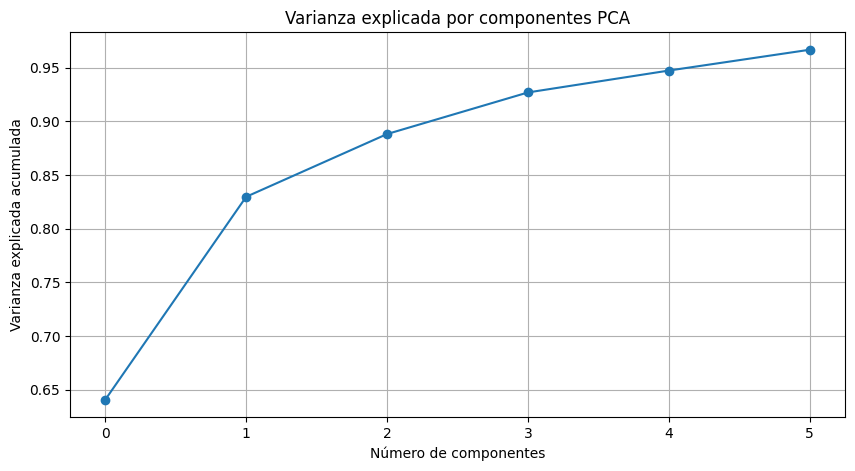

In [228]:
# PCA reteniendo el 95% de varianza (ajuste solo en train)
#PCA(): crea objeto PCA con las reduccion de variables con un 95% de varianza
pca = PCA(n_components=0.95, random_state=1)
X_train_pca = pca.fit_transform(X_train_normalized)  # se ajusta y transforma solo en train
X_test_pca = pca.transform(X_test_normalized)        # mientras que en test solo transformación en test

# Resultados de PCA
print("\nNúmero de componentes seleccionados:", pca.n_components_)
print("Varianza explicada acumulada:", np.cumsum(pca.explained_variance_ratio_))

# Gráfico de varianza explicada
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Número de componentes") #nombre a los ejes
plt.ylabel("Varianza explicada acumulada")
plt.title("Varianza explicada por componentes PCA")
plt.grid()
plt.show()

Como podemos observar, se ha quedado en 6 variables en vez de 12, por lo que hemos reducido bastante la complejidad del dataset y de las variables.

Analizando más en detalle el gráfico: este gráfico muestra la varianza explicada acumulada en función del número de variables principales seleccionadas. Vemos como con la primera variable se explica sobre el 64% de la varianza total. Después, esto se va acumulando y cada variable va sumando más porcentaje. Vemos como solo con las dos primeras variables llegan al 84% de la varianza total y con cuatro sobre un 93%. Con esto podemos concluir que la información está bastante condensada con estas 6 variables ya que llega casi al 95% de la varianza. Esto nos puede indicar que podemos reducir la dimensionalidad sin perder mucha información. Veremos a ver como funciona el modelo antes esta reducción.

## 5-fold
Hemos hecho 5 particiones.

In [229]:
#lo he hecho junto al modelo correspondiente y lo he explicado arriba

## Modelos de aprendizaje automático (mínimo uno de ensemble)

Vamos a explicar las métricas utilizadas, ya que son diferentes a las de clasificación por estar en un problema de regresión:


*   MAE (Mean Absolute Error) mide el error promedio entre los valores reales y las predicciones del modelo. Se calcula como la media de las diferencias absolutas entre los valores reales ($y_i$)y las predicciones ($\hat{y}_i$). Penaliza todos los errores por igual y cuanto más bajo mejor.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} | y_i - \hat{y}_i | $$


*   MSE (Mean Squared Error) es el promedio de los errores elevados al cuadrado. Penaliza más los errores grandes que los pequeños. Se usa mucho en optimización de modelos porque es diferenciable. Tiende a dar más peso a los outliers. Cuanto más bajo mejor.

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

*  RMSE (Root Mean Squared Error) es la raíz cuadrada de MSE. Se usa para interpretar el error en las mismas unidades que la variable objetivo. También penaliza los errores grandes, pero mantiene la escala de la variable objetivo. Cuanto más bajo mejor.
$$RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

*  $R^2$ o coeficiente de determinación mide qué proporción de la variabilidad de la variable dependiente es explicada por el modelo. Está en el intervalo $[0,1]$ y cuanto mejor cerca del 1 más bien ajustado está el modelo.

$$ R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

donde:

$\bar{y}$ es la media de los valores reales.

Para reutilizar código (es parecida que el ejercicio anterior pero cambiando las métricas), he hecho una función para evaluar el modelo con las métricas que creo convenientes. Así después solo tendremos que llamar a esta función y a la del modelo corespondiente. Esta función será solo para holdout.

In [230]:
def evaluar_modelo_regresion(model, X_train, y_train, X_test, y_test):
    #Para poder comparar la rapidez, medimos el tiempo de ejecución del entrenamiento
    start_time = time.time()
    model.fit(X_train, y_train) #Entrenamos el modelo con el conjunto de entrenamiento
    training_time = time.time() - start_time # tiempo de entrenamiento

    #Hacemos la predición en el conjunto de train y test
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #métricas en el conjunto de train
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    #métricas en el conjunto de prueba
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Imprimimos resultados de TRAIN
    print("\nMétricas en el conjunto de entrenamiento:")
    print(f"  - MAE (Error Absoluto Medio): {train_mae:.4f}")
    print(f"  - MSE (Error Cuadrático Medio): {train_mse:.4f}")
    print(f"  - RMSE (Raíz del Error Cuadrático Medio): {train_rmse:.4f}")
    print(f"  - R² (Coeficiente de Determinación): {train_r2:.4f}")

    #Imprimimos los resultados en test
    print("\nMétricas en el conjunto de prueba:")
    print(f"  - MAE (Error Absoluto Medio): {test_mae:.4f}")
    print(f"  - MSE (Error Cuadrático Medio): {test_mse:.4f}")
    print(f"  - RMSE (Raíz del Error Cuadrático Medio): {test_rmse:.4f}")
    print(f"  - R² (Coeficiente de Determinación): {test_r2:.4f}")

    print(f"\nTiempo de entrenamiento: {training_time:.4f} segundos")

    #gráfico de dispersión entre valores reales y predichos
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Línea ideal
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Comparación de valores reales vs. predicciones")
    plt.show()

    return {
        'train_metrics': {
            'MAE': train_mae,
            'MSE': train_mse,
            'RMSE': train_rmse,
            'R2': train_r2
        },
        'test_metrics': {
            'MAE': test_mae,
            'MSE': test_mse,
            'RMSE': test_rmse,
            'R2': test_r2
        },
        'training_time': training_time
    }

Ahora la modificamos para hacer 5-fold:

In [231]:
def evaluar_modelo_kfold_regresion(model, X, y, n_splits=5, random_state=19):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=random_state) #crea las particiones con un barajeo
    scaler = MinMaxScaler() #normalizamos con la misma que el holdout

    #almacenamos las métricas de cada fold
    train_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}
    test_metrics = {'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}
    training_times = []

    for i, (train_index, test_index) in enumerate(kf.split(X)):
        #normalizamos independiente para cada fold
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        X_train_scaled = scaler.fit_transform(X_train) #en train si apredemos y aplicamos
        X_test_scaled = scaler.transform(X_test) #al test solo se lo aplicamos

        #train
        start_time = time.time() #medimos el tiempo de inicio
        model.fit(X_train_scaled, y_train)
        training_time = time.time() - start_time #tiempo total transcurrido
        training_times.append(training_time)

        #test
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        #métricas train
        train_metrics['MAE'].append(mean_absolute_error(y_train, y_train_pred))
        train_metrics['MSE'].append(mean_squared_error(y_train, y_train_pred))
        train_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
        train_metrics['R2'].append(r2_score(y_train, y_train_pred))

        #métricas test
        test_metrics['MAE'].append(mean_absolute_error(y_test, y_test_pred))
        test_metrics['MSE'].append(mean_squared_error(y_test, y_test_pred))
        test_metrics['RMSE'].append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
        test_metrics['R2'].append(r2_score(y_test, y_test_pred))

        #imprimimos los resultados por cada fold
        print(f"\nFold {i+1}/{n_splits}:")
        print(f"  Test MAE: {test_metrics['MAE'][-1]:.4f}")
        print(f"  Test R²: {test_metrics['R2'][-1]:.4f}")
        print(f"  Tiempo: {training_time:.2f}s")

    #calculamos promedios de cada métrica
    avg_train_metrics = {k: np.mean(v) for k, v in train_metrics.items()}
    avg_test_metrics = {k: np.mean(v) for k, v in test_metrics.items()}
    avg_time = np.mean(training_times)

    #gráfico de dispersión entre valores reales y predichos en el último fold
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Línea ideal
    plt.xlabel("Valores reales")
    plt.ylabel("Predicciones")
    plt.title("Comparación de valores reales vs. predicciones (Último Fold)")
    plt.show()

    #resultados finales
    return {
        'train_metrics': avg_train_metrics,
        'test_metrics': avg_test_metrics,
        'training_time': avg_time,
        'fold_details': {
            'train': train_metrics,
            'test': test_metrics,
            'times': training_times
        }
    }

Vamos a aplicar varios modelos para ver que características tienen y ver cuales funcionan mejor.

*   Regresión lineal
*   SVM
*   RandomForest


### Regresión lineal
Un modelo lineal realiza una predicción calculando una suma ponderada de las características de entrada, más una
constante denominada término de sesgo.

$$ \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$

donde:
$\hat{y}$ es el valor previsto.  
- $n$ es el número de características.  
- $x_i$ es el valor de la característica $i^{th}$.  
- $\theta_j$ es el parámetro $j$ del modelo $i^{th}$, que incluye el término de sesgo $\theta_0$ y las ponderaciones de las características $\theta_1, \theta_2, \cdots, \theta_n$.

Si utilizamos una forma vectorizada:
$$
\hat{y} = h_\theta(x) = \theta \cdot x
$$

Para entrenar un modelo de regresión lineal, necesitamos encontrar el valor de $\theta$ que minimice el RMSE. En la práctica, es más sencillo minimizar el error cuadrático medio (MSE) que el RMSE, y conduce al mismo resultado.


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.3850
  - MSE (Error Cuadrático Medio): 0.2452
  - RMSE (Raíz del Error Cuadrático Medio): 0.4952
  - R² (Coeficiente de Determinación): 0.9828

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.3588
  - MSE (Error Cuadrático Medio): 0.2144
  - RMSE (Raíz del Error Cuadrático Medio): 0.4631
  - R² (Coeficiente de Determinación): 0.9818

Tiempo de entrenamiento: 0.0020 segundos


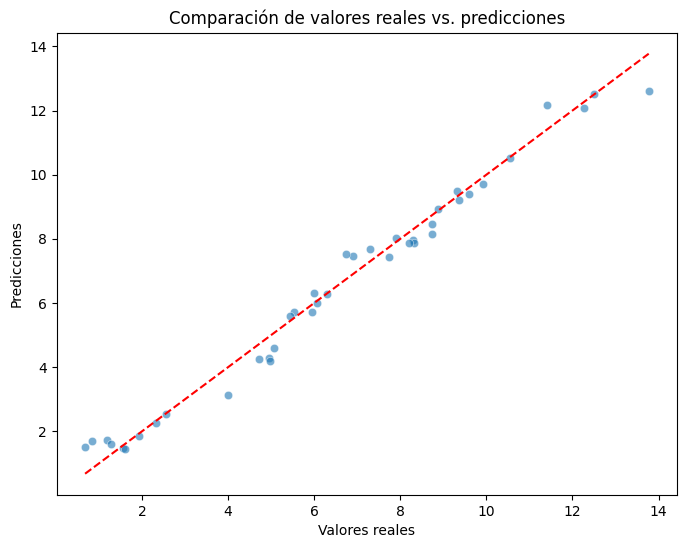

In [232]:
#definimos el modelo de regresion lineal
modelo_lr = LinearRegression()

#evaluamos con nuestra funcion
resultados_reg_lineal = evaluar_modelo_regresion(modelo_lr, X_train_normalized, y_train, X_test_normalized, y_test)

Como podemos observar hace unos resultados óptimos con un coeficientes de determinación del 0.9817, lo que indica que el modelo explica el 98.18% de la variabilidad de los datos (cuanto más cerca de 1 mejor que sería la explicación absoluta). Además, el MAE (Error Absoluto Medio) = 0.3588 que indica que, en promedio, las predicciones se desvían en 0.3588 unidades del valor real. Como es un valor bajo, indica que el modelo tiene buenas predicciones. El MSE penaliza más los errores grandes que el MAE, y su valor es bajo, lo que es positivo.

La gráfica muestra una comparación entre los valores reales y las predicciones. La línea roja representa la diagonal $y=x$, que es la línea ideal donde las predicciones coincidirían exactamente con los valores reales. Podemos observar que los puntos están muy cerca de la línea roja, lo que indica un modelo con predicciones muy buenas.

Este modelo es un modelo sencillo pero vemos que obtenemos muy buenos resultados. Esto puede deberse a que los datos tengan una relación lineal fuerte, que los datos esten bien filtrados y no haya ruido...

Vamos a probar a hacerlo con un 5-fold. Así aprovechamos los pocos ejemplos que hay para aprender ya que no quitamos ejemplos para aprender, si no que lo hacemos fold a fold.


Fold 1/5:
  Test MAE: 0.3588
  Test R²: 0.9818
  Tiempo: 0.00s

Fold 2/5:
  Test MAE: 0.5638
  Test R²: 0.9590
  Tiempo: 0.00s

Fold 3/5:
  Test MAE: 0.4285
  Test R²: 0.9816
  Tiempo: 0.00s

Fold 4/5:
  Test MAE: 0.4633
  Test R²: 0.9730
  Tiempo: 0.00s

Fold 5/5:
  Test MAE: 0.3297
  Test R²: 0.9829
  Tiempo: 0.00s


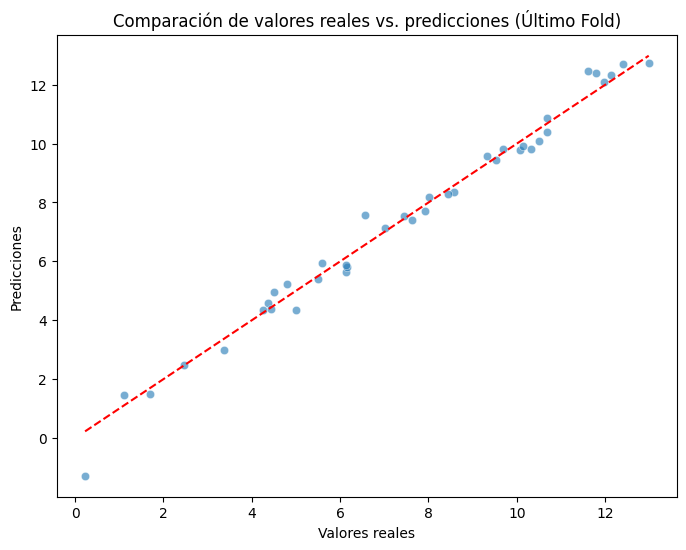

In [233]:
#convertimos X e Y a arrays de NumPy
X_np = np.array(X)
Y_np = np.array(Y)

#definimos el modelo de regresion lineal
modelo_lr_kfold = LinearRegression()

#validación cruzada con KFold (5 folds)
resultados_lr_kfold = evaluar_modelo_kfold_regresion(modelo_lr_kfold, X_np, Y_np, n_splits=5, random_state=19)

Vemos como el error MAE en algunos folds sube un poco más y en promedio. El $R^2$ es parecido o un poco más bajo que con hold out. Puede ser que justo en ese fold haya salido con una distribución diferente al conjunto total. De hecho, el segundo fold es el que ha salido peor. Vemos como todos los folds se ejecutaron muy rápido, lo que es una ventaja de este modelo.

### SVM

Para utilizar las SVM para regresión en vez de clasificación, tendremos que modificar el objetivo: en lugar de intentar ajustar la mayor calle
posible entre dos clases limitando al mismo tiempo las violaciones del
margen, la regresión SVM intenta ajustar el mayor número posible de
instancias en la calle limitando al mismo tiempo las violaciones del margen
(es decir, instancias fuera de la calle).

La anchura de la calle se controla mediante un hiperparámetro, $\epsilon$. Cuanto mas pequeño sea $\epsilon$, menos margen tendrá.

Reducir $\epsilon$ aumenta el número de vectores de soporte, lo que regulariza el
modelo.

Además, si añades más instancias de entrenamiento dentro del margen,
no afectará a las predicciones del modelo; por tanto, se dice que el
modelo es $\epsilon$-insensible.

Para abordar tareas de regresión no lineal, puede utilizar un modelo SVM
kernelizado.


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.2273
  - MSE (Error Cuadrático Medio): 0.1383
  - RMSE (Raíz del Error Cuadrático Medio): 0.3719
  - R² (Coeficiente de Determinación): 0.9903

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.2213
  - MSE (Error Cuadrático Medio): 0.1000
  - RMSE (Raíz del Error Cuadrático Medio): 0.3163
  - R² (Coeficiente de Determinación): 0.9915

Tiempo de entrenamiento: 0.0044 segundos


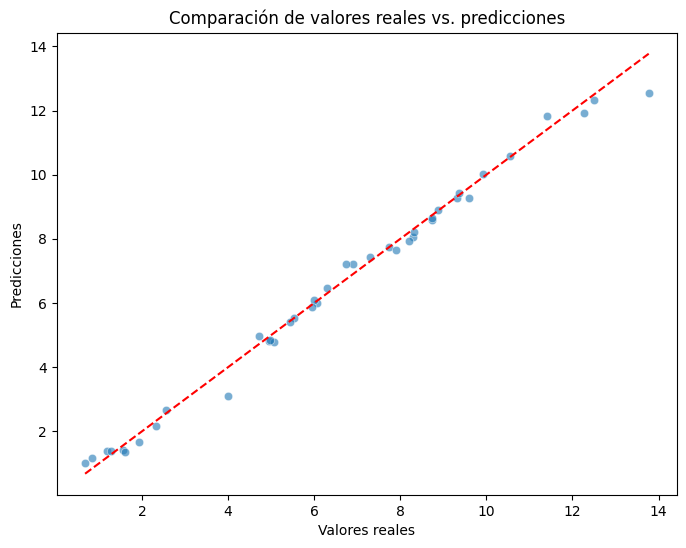

In [234]:
#definimos el modelo de SVM
modelo_svm = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)

#evaluamos con la funcion creada
resultados_svm = evaluar_modelo_regresion(modelo_svm, X_train_normalized, y_train, X_test_normalized, y_test)

Podemos observar como en test tenemos un coeficiente de determinación de 0.9915, lo cual nos indica que el modelo explica el 99.15% de la variabilidad de los datos, lo cual es bastante bueno. Mirando los otros errores, son pequeños.

El gráfico de dispersión muestra que las predicciones siguen la linea roja, por lo que no estamos ante un problema de sesgo o de varianza alta.

### Random Forest Regressor
Los dos siguientes algoritmos pertenecen a una misma idea: inducir $n$ clasificadores (pueden estar basados en distintas técnicas: reglas, árboles…) en vez de solo uno. Son los más exitosos. Se usa cuando los clasificadores individuales son malos por sí solos, luego combinan $n$ predicciones.

El algoritmo de Random Forest está dentro de la técnica de Bagging (de hecho es el algoritmo más famoso en este marco), que consiste en entrenar varios clasificadores independientes y combinar sus predicciones. Cada clasificador se entrena con una parte aleatoria del conjunto de entrenamiento, y se promedian las predicciones de todos los clasificadores. Funciona bien con algoritmos inestables (pequeño cambio en el set de entrenamiento provoca grandes cambios en la predicción). El algoritmo hace una selección aleatoria de un conjunto muy pequeño de variables para elegir de ellas el atributo que construye el árbol, sin poda. La aleatoriedad en la selección de ejemplos y características hace que los árboles sean distintos entre sí, y si la cantidad es lo suficientemente grande, el conjunto de árboles será robusto y generalizable.

La versión que vamos a utilizar es Random Forest Regressor y su objetivo es predecir valores numéricos continuos. Para realizar una predicción, cada árbol genera su propia predicción. El resultado final es el promedio de todas las predicciones individuales de los árboles.


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.0905
  - MSE (Error Cuadrático Medio): 0.0259
  - RMSE (Raíz del Error Cuadrático Medio): 0.1611
  - R² (Coeficiente de Determinación): 0.9982

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.1614
  - MSE (Error Cuadrático Medio): 0.0727
  - RMSE (Raíz del Error Cuadrático Medio): 0.2697
  - R² (Coeficiente de Determinación): 0.9938

Tiempo de entrenamiento: 0.2358 segundos


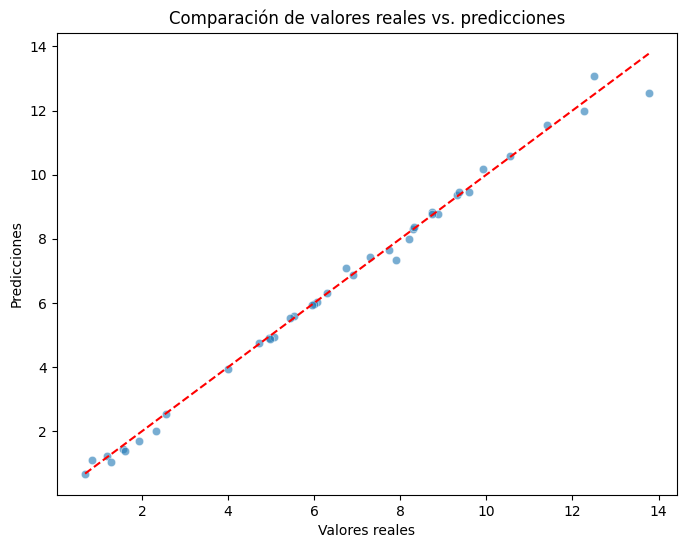

In [235]:
#definimos el modelo de RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=19)

#evaluamos el modelo con nuestra funcion
resultados_rf = evaluar_modelo_regresion(modelo_rf, X_train_normalized, y_train, X_test_normalized, y_test)

Este modelo mejora al anterior un poco llegando casi al 100% de coeficiente de determinación. Tiene prácticamente el mismo $R²$ tanto en test como en train, aunque MAE y RMSE suben un poco en test, lo cual es totalmente normal.

Probamos ahora con la seleccción de características que hemos hecho con PCA:


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.1275
  - MSE (Error Cuadrático Medio): 0.0511
  - RMSE (Raíz del Error Cuadrático Medio): 0.2261
  - R² (Coeficiente de Determinación): 0.9964

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.1920
  - MSE (Error Cuadrático Medio): 0.0680
  - RMSE (Raíz del Error Cuadrático Medio): 0.2607
  - R² (Coeficiente de Determinación): 0.9942

Tiempo de entrenamiento: 0.1778 segundos


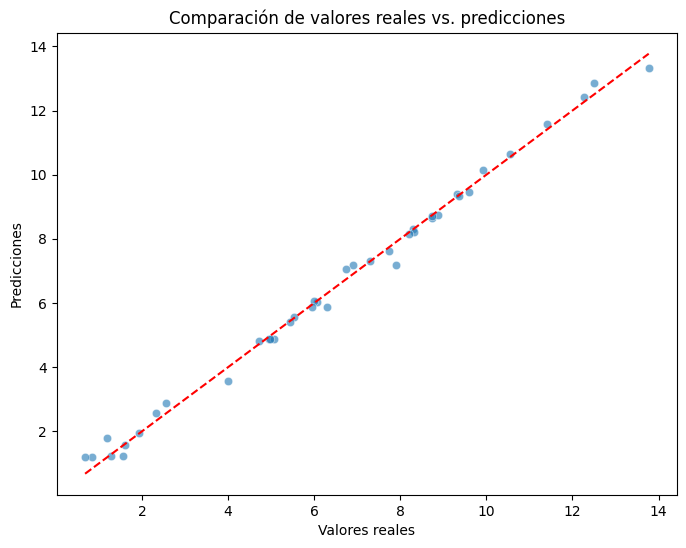

In [236]:
#definimos el modelo de RandomForestRegressor con pca
modelo_rf_pca = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=19)

#evaluamos el modelo con nuestra funcion
resultados_rf_pca = evaluar_modelo_regresion(modelo_rf, X_train_pca, y_train, X_test_pca, y_test)

Vemos como prácticamente tiene los mismos resultados. Lo único que es que aumento un poco el error MAE. Aun así, como hemos reducido la dimensionalidad y viendo que había mucha correlación, nos hemos quedado con un modelo más sencilo y que explica casi lo mismo.

## Selección de hiperparámetros
Incluyendo el tipo de regularización a usar.


Hiperparámetros de los modelos elegidos:
*  **Regresión lineal** : fit_intercept (si se ajusta el bias de la ecuación), normalize (normalizacion), n_jobs (numero de procesadores a usar en paralelo) y positive (restringe coeficientes a los valores positivos).
*   **SVM**: c (penalización del error), kernel (tipo de función de transformación), degree (grado del polinomio si kernel='poly'), gamma (controla la influencia de cada punto de entrenamiento), epsilon (margen de tolerancia para errores) y shrinking (si se usa optimización de reducción del problema).
*   **Random Forest Regressor**: n_estimators (números de árboles en el bosque), max_depth (profundida máxima de cada árbol), max_depth (número mínimo de muestras requeridas para dividir un nodo), min_samples_leaf (número mínimo de muestras requeridas en cada hoja), max_features (número máximo de características a considerar al buscar la mejor división)...


Para el caso de regresión lineal no me parece intersante cambiar nigún hiperparámetro ya que si desactivamos el fit_intercept no se utilizará ningún intercepto en los cálculos, es decir, se espera que los datos estén centrados, lo cual no es nuestro problema. En cuanto a la normalización, ya la hemos hecho previamente.

Para SVM, aunque el modelo que nos sale con los hiperparámetros escogidos es bastante bueno, vamos a jugar a cambiarlos. Vamos a intentar reducir la complejidad del modelo sin perder mucha tasa de acierto.

Tenemos un C=100, lo cual nos dice que esta intentando minimizar el error y puede llevar al sobreajuste. Vamos a poner un C más bajo para que generalice mejor.

Por otro lado, voy a probar con un epsilon más alto ya que con 0.1 significa que intenta predecir con muy poca tolerancia al error. Aumentándolo, el modelo intentara ignorar pequeños errores y mejorar la generalización.


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.3267
  - MSE (Error Cuadrático Medio): 0.2374
  - RMSE (Raíz del Error Cuadrático Medio): 0.4873
  - R² (Coeficiente de Determinación): 0.9834

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.2902
  - MSE (Error Cuadrático Medio): 0.1855
  - RMSE (Raíz del Error Cuadrático Medio): 0.4307
  - R² (Coeficiente de Determinación): 0.9843

Tiempo de entrenamiento: 0.0065 segundos


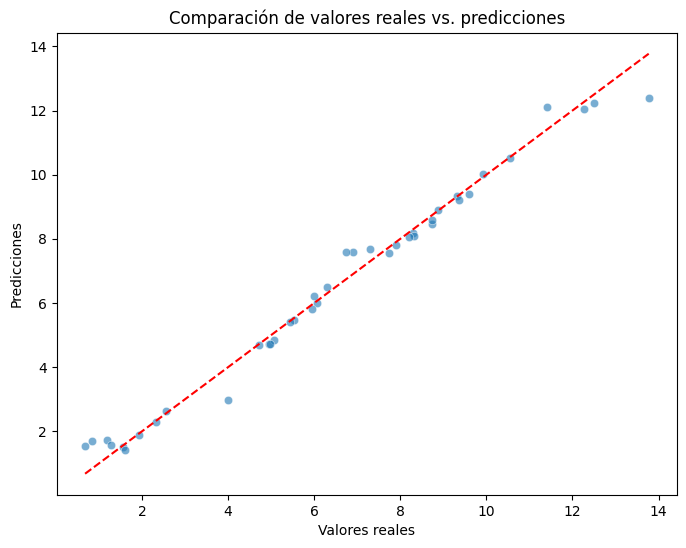

In [237]:
#definimos el modelo de SVM
modelo_svm = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.2)

#evaluamos con la funcion creada
resultados_svm_hiperparametros = evaluar_modelo_regresion(modelo_svm, X_train_normalized, y_train, X_test_normalized, y_test)

Vemos como reduce el rendimiento general pero al bajar el C hace que el modelo no se ajuste tanto a cada punto y así tengamos menos sobreajuste. Todo acosta de aumentar un poco el error.

Para el random forest regressor, antes no hemos puesto límite a la profundidad máxima de los árboles por lo que puede llevar al overfitting. Vamos a reducir max_depth para hacer un modelo más pequeño y general.


Métricas en el conjunto de entrenamiento:
  - MAE (Error Absoluto Medio): 0.1125
  - MSE (Error Cuadrático Medio): 0.0346
  - RMSE (Raíz del Error Cuadrático Medio): 0.1860
  - R² (Coeficiente de Determinación): 0.9976

Métricas en el conjunto de prueba:
  - MAE (Error Absoluto Medio): 0.1693
  - MSE (Error Cuadrático Medio): 0.0783
  - RMSE (Raíz del Error Cuadrático Medio): 0.2798
  - R² (Coeficiente de Determinación): 0.9934

Tiempo de entrenamiento: 0.2048 segundos


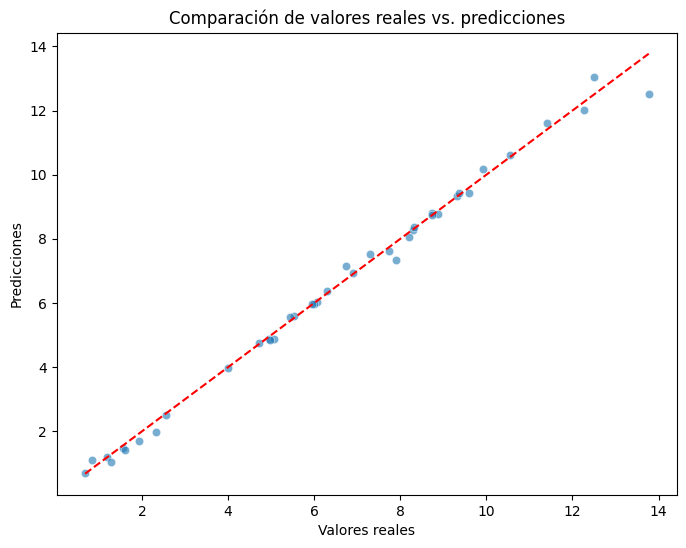

In [238]:
#definimos el modelo de RandomForestRegressor
modelo_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=19)

#evaluamos el modelo con nuestra funcion
resultados_random_forest_prof = evaluar_modelo_regresion(modelo_rf, X_train_normalized, y_train, X_test_normalized, y_test)

Vemos que con un máximo de 5 de profundidad salen prácticamente los mismos resultados, por lo que podríamos elegir este por tener menos complejidad.

## Entrenamiento, discusión de resultados y conclusiones

In [239]:
#el entrenamiento ya lo he hecho anteriormente con cada modelo

Para poder discutir bien los resultados de los diferentes algoritmos implementados y llegar a conclusiones, voy a hacer una tabla con las métricas de cada algoritmo.

In [240]:
resultados = {
    'Regresión lineal': resultados_reg_lineal,
    'Regresión lineal 5fold': resultados_lr_kfold,
    'SVM': resultados_svm,
    'Random Forest': resultados_rf,
    'Random Forest con PCA': resultados_rf_pca,
    'SVM con hiperparámetros': resultados_svm_hiperparametros,
    'Random Forest profundidad 5':resultados_random_forest_prof
}

In [241]:
#hacemos una lista de diccionarios
datos_tabla = []
for nombre, res in resultados.items():
    fila = {
        'Modelo': nombre,
        'Train MAE': res['train_metrics']['MAE'],
        'Train MSE': res['train_metrics']['MSE'],
        'Train RMSE': res['train_metrics']['RMSE'],
        'Train R²': res['train_metrics']['R2'],
        'Test MAE': res['test_metrics']['MAE'],
        'Test MSE': res['test_metrics']['MSE'],
        'Test RMSE': res['test_metrics']['RMSE'],
        'Test R²': res['test_metrics']['R2'],
        'Tiempo (s)': res['training_time']
    }
    datos_tabla.append(fila)

In [242]:
#convertimos a DataFrame y ordenar por acuraccy del test
df_comparativo_r2 = pd.DataFrame(datos_tabla).sort_values('Test R²', ascending=False)

#mostramos tabla de resultados
print(df_comparativo_r2.to_markdown(index=False))

| Modelo                      |   Train MAE |   Train MSE |   Train RMSE |   Train R² |   Test MAE |   Test MSE |   Test RMSE |   Test R² |   Tiempo (s) |
|:----------------------------|------------:|------------:|-------------:|-----------:|-----------:|-----------:|------------:|----------:|-------------:|
| Random Forest con PCA       |   0.127511  |   0.0511112 |     0.226078 |   0.996417 |   0.192045 |  0.0679583 |    0.260688 |  0.994239 |  0.177789    |
| Random Forest               |   0.0905418 |   0.0259492 |     0.161087 |   0.998181 |   0.16135  |  0.0727388 |    0.269701 |  0.993834 |  0.235847    |
| Random Forest profundidad 5 |   0.112465  |   0.0345798 |     0.185957 |   0.997576 |   0.169341 |  0.0782919 |    0.279807 |  0.993363 |  0.204754    |
| SVM                         |   0.227287  |   0.138273  |     0.371851 |   0.990307 |   0.221333 |  0.100034  |    0.316281 |  0.99152  |  0.00438046  |
| SVM con hiperparámetros     |   0.326713  |   0.237443  |     0.4872

Hemos ordenado y puesto primeros los que mejor coeficiente de determinación tenga. Vemos como el primero de todos es el random forest con pca. Esto significa que la selección de variables ha venido bien y encima nos ha dado un modelo más simplificado. Entre la familia de random forest, el que limitamos la profundidad es el que peor va, pero aun así estamos perdiendo muy poco, sacrificandolo por tener un árbol más sencillo. Vemos como es un algoritmo potente teóricamente y prácticamente ya que es el que mejor predice.

A continuación van los SVM, donde tienen un poco menos de coeficiente de determinación pero aun así siguen teniendo muy buenos resultados.

Por último y no con mucha diferencia de buenos resultados va la regresión lineal. Vemos como es normal porque es el modelo más sencillo pero aun siendo tan sencillo da buenos resultados. Cabe destacar que ha salido mejor con hold-out que con cross validation. Teóricamente debería de ser al revés ya que en el kfold estamos entrenando con todos los ejemplos y eso debería de ser beneficioso en datasets pequeños como el nuestro. Esto puede deberse a que hemos visto que un fold en concreto ha salido más bajo de la media, por lo que podría deberse a una distribución diferente a la del cojunto. Sería interesante probar con un kfold estratificado para que la distribución en todos los folds sea más o menos la misma.

En general no baja del 97% de explicabilidad, lo cual nos indica que son buenos modelos que se adaptan bien a los datos y predicen bien y que posiblemente sea un dataset fácil con los datos muy limpios.

In [243]:
#convertimos a DataFrame y ordenar por tiempo ascendente
df_comparativo_tiempo_regresion = pd.DataFrame(datos_tabla).sort_values('Tiempo (s)', ascending=True)

#mostramos tabla de resultados
print(df_comparativo_tiempo_regresion.to_markdown(index=False))

| Modelo                      |   Train MAE |   Train MSE |   Train RMSE |   Train R² |   Test MAE |   Test MSE |   Test RMSE |   Test R² |   Tiempo (s) |
|:----------------------------|------------:|------------:|-------------:|-----------:|-----------:|-----------:|------------:|----------:|-------------:|
| Regresión lineal 5fold      |   0.373323  |   0.229787  |     0.478814 |   0.983402 |   0.428811 |  0.339881  |    0.567116 |  0.975676 |  0.000964355 |
| Regresión lineal            |   0.384984  |   0.245227  |     0.495204 |   0.982809 |   0.358827 |  0.214417  |    0.463052 |  0.981823 |  0.00198054  |
| SVM                         |   0.227287  |   0.138273  |     0.371851 |   0.990307 |   0.221333 |  0.100034  |    0.316281 |  0.99152  |  0.00438046  |
| SVM con hiperparámetros     |   0.326713  |   0.237443  |     0.487281 |   0.983355 |   0.290221 |  0.185526  |    0.430727 |  0.984273 |  0.00647187  |
| Random Forest con PCA       |   0.127511  |   0.0511112 |     0.2260

Por último, comparemos el tiempo de todos los algoritmos utilizados. Se ve claramente como cuanto más aumenta la complejidad del algoritmo más tiempo tardan.

Primero han quedado con menos tiempo las regresiones lineales. Son los modelos más sencillos y con menos tiempo de cómputo, lo cual tiene sentido. Debería de tardar menos el de hold-out que el de kfold, pero es verdad que el tiempo de diferencia es diminuto.

Los siguientes son los SVM que no se diferencian mucho con la regresión lineal.

Por último, el random forest es el que más tarda ya que es el más complejo y con más cómputo. Vemos como el de pca donde hemos disminuido la dimensionalidad del modelo y el de con limitación de la profundidad son los que menos tardan, lo cual es lógico. Aun así, aunque sean los más lentos de este ejercicio no sobrepasan las tres décimas de segundo. Esto también puede ser debido a que el dataset de este ejercicio es muy pequeño.